# Census Income Project
***

##### Batch - DS0422

##### Submitted by - Akash Shrivastava

***

## Problem Statement:

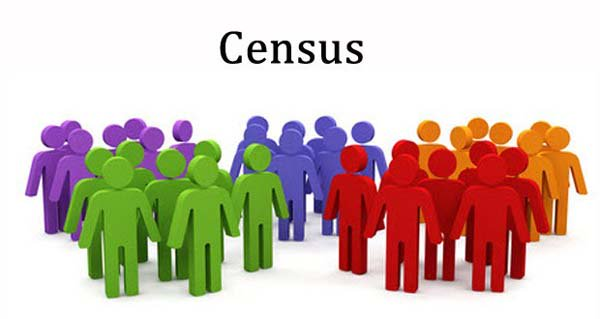

**This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over dollar 50K a year.**

### Description of fnlwgt (final weight)

**The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:**

1. *A single cell estimate of the population 16+ for each state.*

2. *Controls for Hispanic Origin by age and sex.*

3. *Controls by Race, age and sex.*

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



**To download the dataset, use the link given below.** 

**Downlaod Files:**
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

***

##### - Importing required libraries

In [1]:
import numpy as np  #---- for computation
import pandas as pd #---- for dataframe dependencies

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# for stats
from scipy import stats

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

##### - Importing casestudy dataset(.csv_file)

In [2]:
df=pd.read_csv('census_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
print('No. Of Rows -',df.shape[0])
print('No. Of Columns -',df.shape[1])

No. Of Rows - 32560
No. Of Columns - 15


In [6]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

##### Comment - Most of the columns are self explanatory and remaining is explain below:

**1. Fnlwgt - sampling weight.**

**2. Education_num - number of years spent in education.**

**3. Capital_gain/Capital_loss - income from investment sources . It either can be in profit or loss.**

In [8]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

##### Comment - As we can observe that this dataset is a healthy mix of both categorical and integer type of datatypes.

1. We have 9 object datatypes.

2. We have 6 integer datatypes.

**Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex,Native_country are all categorical in nature, as it's the case with target variable Income.**

**while Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week are continuous in nature.**

In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Comment - There are 32536 rows,14 independent columns and 1 target feature.

## Statistical Analysis 

- Data Integrity Check

###### Since dataset is large,Let's check for any entry which is repeated or duplicated in dataset.

In [11]:
df.duplicated().sum() 

24

###### Let's check if any whitespace,'?' 'NA' orr '-' exist in dataset

In [12]:
df.isin([' ','NA','-','?']).sum().any()

False

##### Commet -

*No whitespace , NA,'-' exist in dataset.*

###### Let's drop duplicated entries before cheking null values

In [13]:
df.drop_duplicates(keep='last' , inplace=True)

In [14]:
df.shape

(32536, 15)

### Missing Null Value Check 

In [15]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

##### Comment - There is no null values/missing values.

##### - From above observation there is no null values/missing values.But if we carefully observe the dataset there are some null values/missing values represented by a symbol i.e ' ?'.

In [16]:
# Separating numerical and categorical varible
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week',]
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

##### - Start Exploring categoriccal features with enlisting value counts & sub-categories

In [17]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       41

##### Comment - So we can observe symbol '?' in three attributes i.e 'Workclass','Occupation',& 'Native_country' with modes of each attributes.

###### Let's check how many question mark("?") inside dataset

In [18]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

###### Let's replace '?' with np.NaN

In [19]:
df=df.replace(' ?',np.NaN)

<AxesSubplot:>

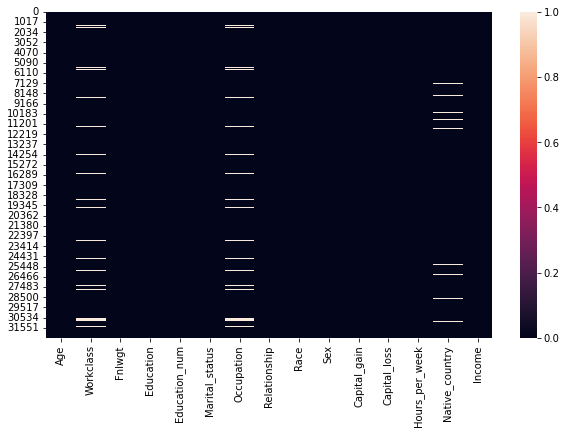

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

##### Comment - There is null values/missing values.

### Missing value imputation

###### 'Occupation','Workclass' and 'Native_country' are categorical variable so we can imputate them with mode of the feature.

In [21]:
#Imputating missing value with mode for categorical features 
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

In [22]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                Missing Values  % Missing data
Age                          0             0.0
Workclass                    0             0.0
Fnlwgt                       0             0.0
Education                    0             0.0
Education_num                0             0.0
Marital_status               0             0.0
Occupation                   0             0.0
Relationship                 0             0.0
Race                         0             0.0
Sex                          0             0.0
Capital_gain                 0             0.0
Capital_loss                 0             0.0
Hours_per_week               0             0.0
Native_country               0             0.0
Income                       0             0.0


###### Comment - Finally there is no missing values present.

### Statistical Matrix

<AxesSubplot:>

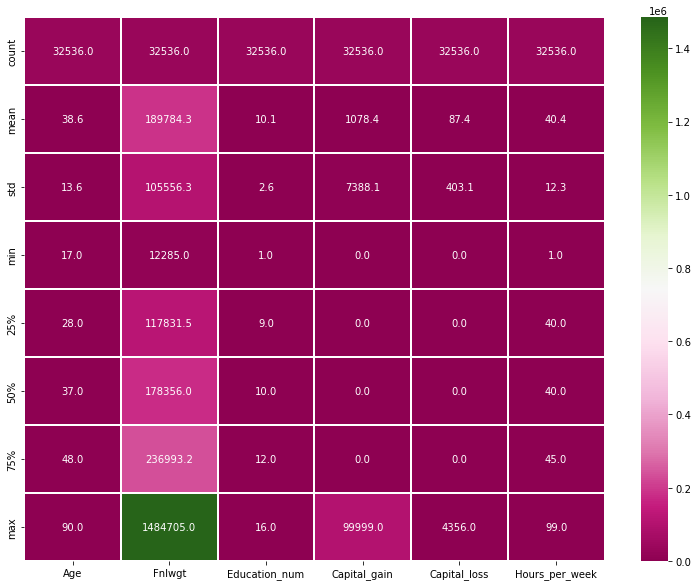

In [23]:
##visualization the statistics of columns using heatmap
plt.figure(figsize=(13,10))
sns.heatmap(df.describe(),linewidths = 0.1, fmt= '0.1f',annot = True,cmap='PiYG')

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


##### Comment -

- **The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.**

- **The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.**

- **While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.**

- **The number of hours spent per week varies between 1 to 99 and the average being 40 hours.**

In [25]:
# checking for the unique values in each attributes
df.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

## EDA

### Univariate Analysis

<AxesSubplot:xlabel='Income', ylabel='count'>

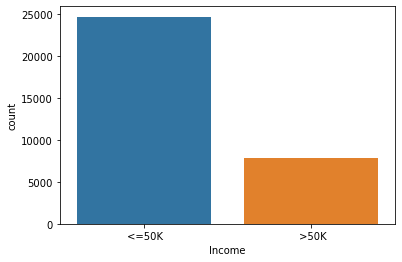

In [26]:
#counplot for income
sns.countplot(df['Income'])

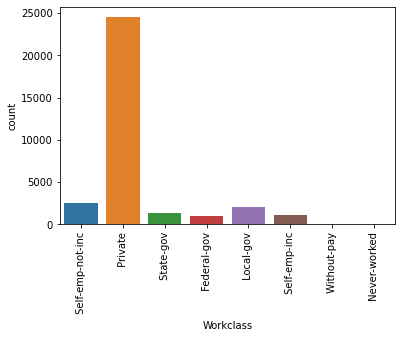

In [27]:
#counplot for workclass
sns.countplot(df['Workclass'])
plt.xticks(rotation=90)
plt.show()

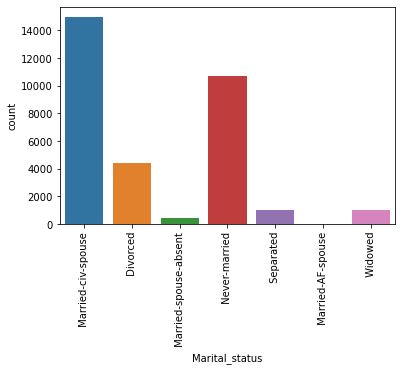

In [28]:
#counplot for Marital_status
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
plt.show()

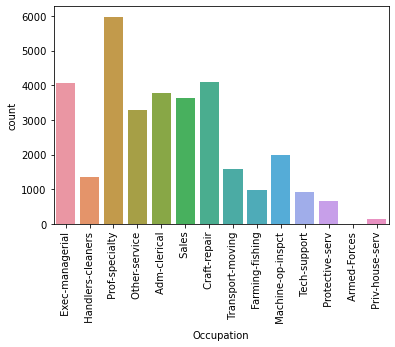

In [29]:
#counplot for Occupation
sns.countplot(df['Occupation'])
plt.xticks(rotation=90)
plt.show()

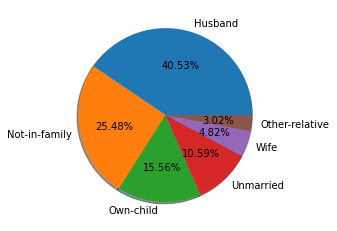

In [30]:
#plotting pie chart for Relationship
df['Relationship'].value_counts()
labels='Husband','Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax = plt.subplots()
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%' , shadow=True)
plt.show()

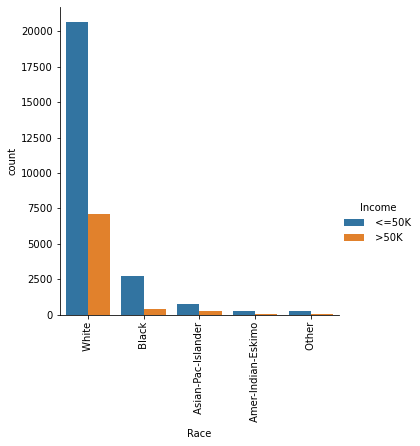

In [31]:
sns.factorplot('Race',kind='count',data=df,hue='Income')
plt.xticks(rotation=90)
plt.show()

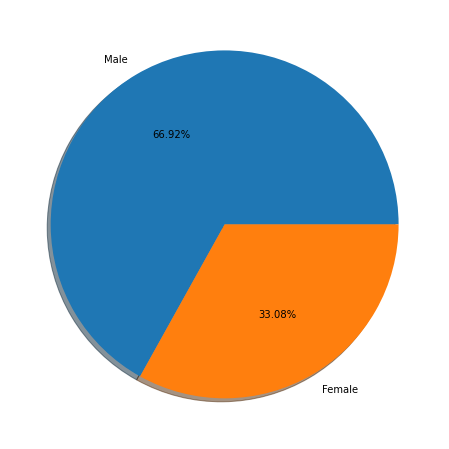

In [32]:
# Visualize the count of sex group of people
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%' , shadow=True)
plt.show()

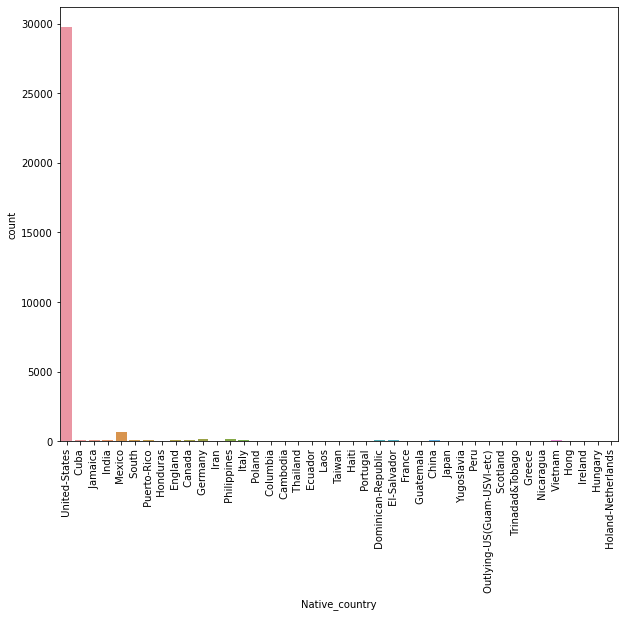

In [33]:
#Visualizing the Native country of the people
plt.figure(figsize=(10,8))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

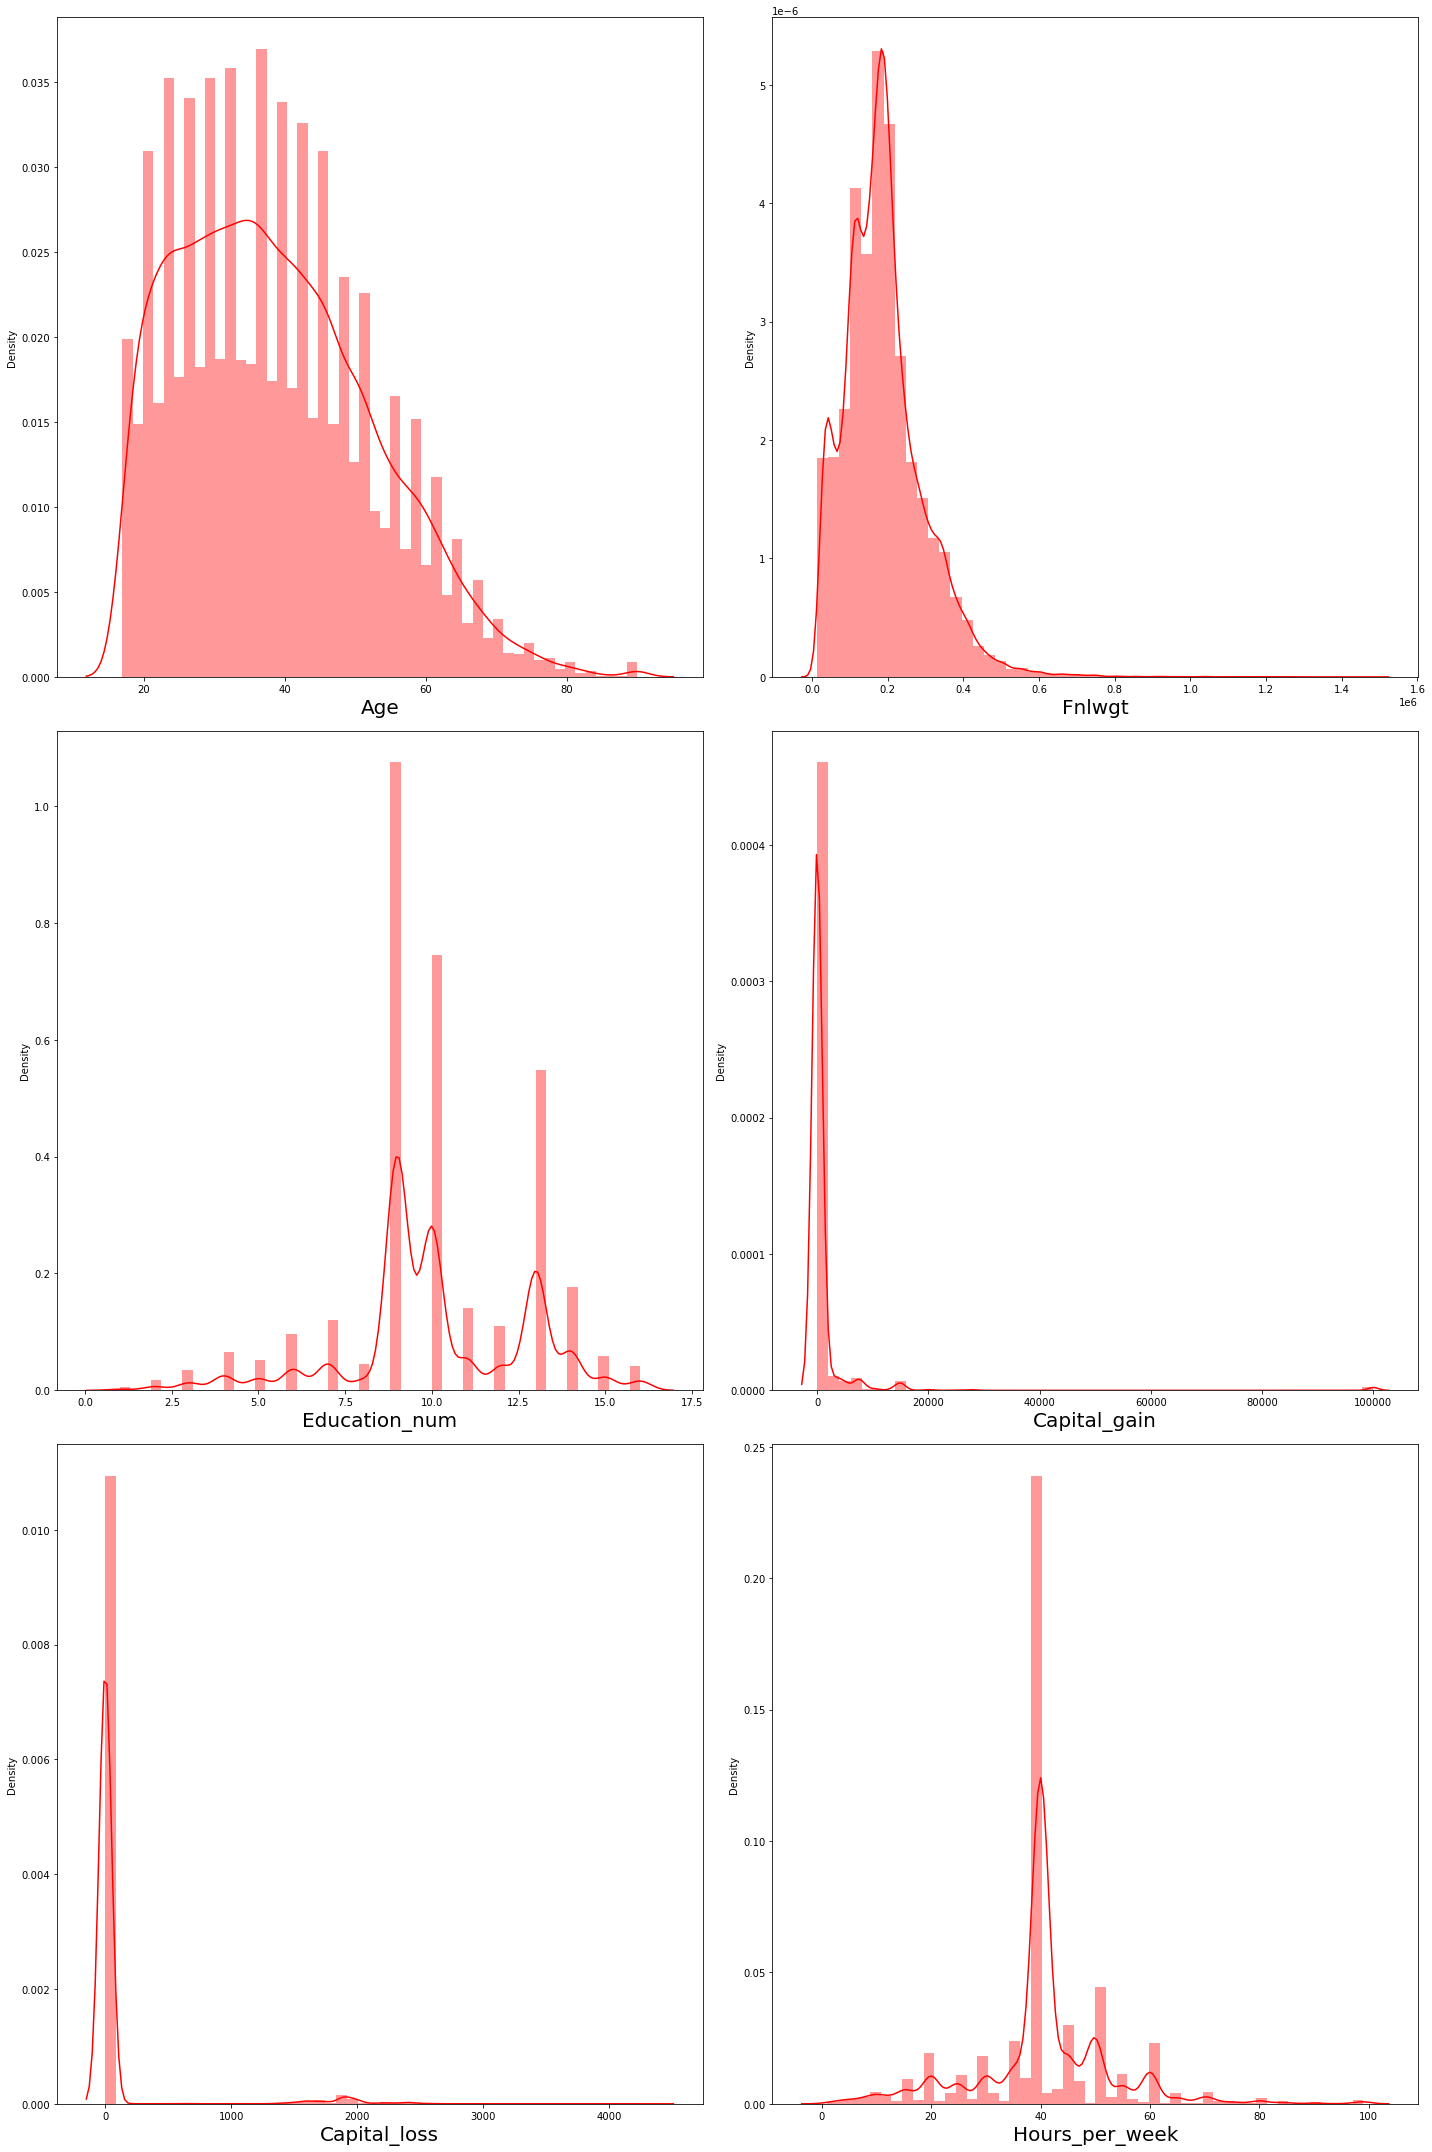

In [34]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber =1
for column in Numerical:
    if plotnumber <=6:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Analysing Target Variable

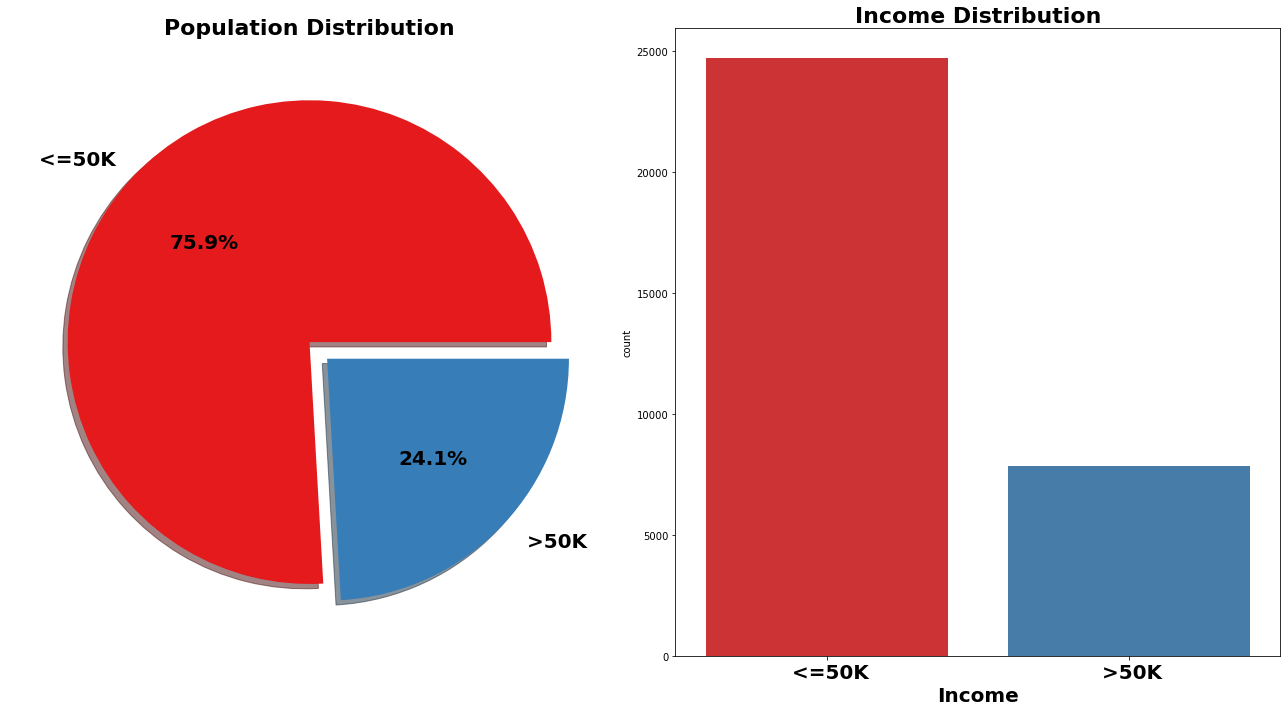

In [35]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Income',data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Income',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.show()

##### Comment - 

- **75.9% population i.e 24697 peoples have income less than 50k.**
- **We can observe that our target variable 'Income' is imbalanced**

###### To gain more insight let's check each feature against Target variable .

### Bivariate Analysis

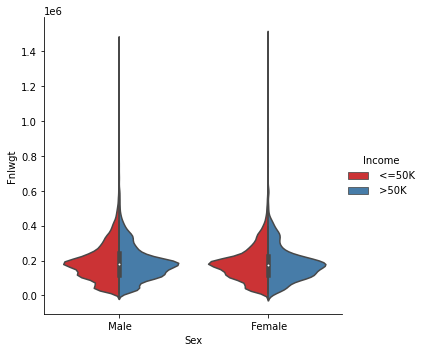

In [36]:
# let's plot catplot for sex and fnlwgt
sns.catplot(x='Sex',y='Fnlwgt',hue='Income',kind='violin',data=df,split=True)
plt.show()

##### Comment - For both male and female Fnlwgt is same and they also have same income.

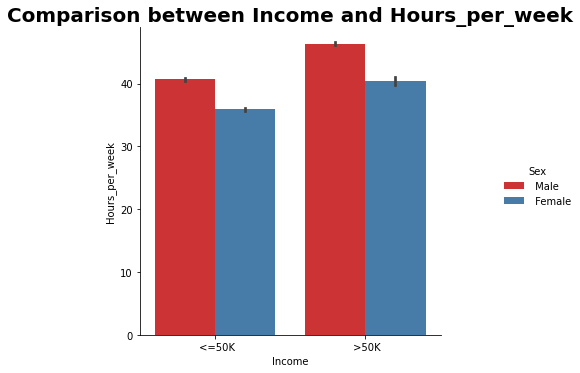

In [37]:
# visualizing the number of hours per weeek with income
sns.catplot(x='Income',y='Hours_per_week',hue='Sex',kind='bar',data=df)
plt.title('Comparison between Income and Hours_per_week',fontsize=20,fontweight='bold')
plt.show()

##### Comment - From above visualization we can say that income is related to hours per week. The income>50k when the hours per week is higher.

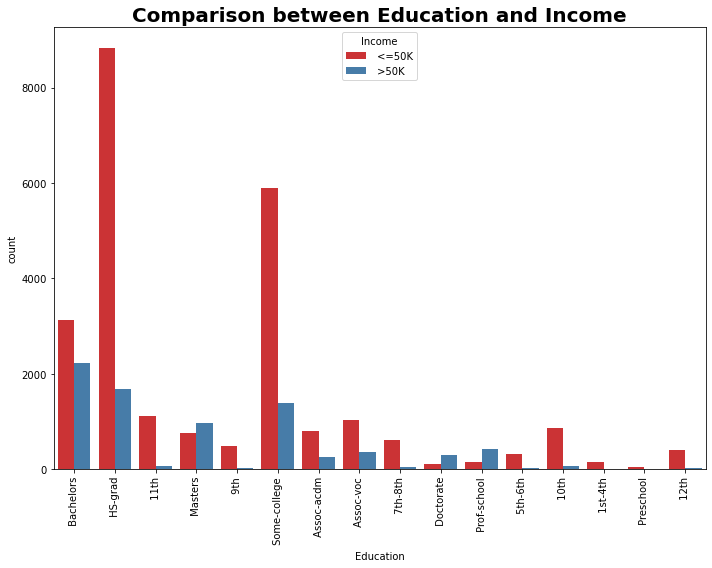

In [38]:
# visualizing the relation between education and income of people
plt.figure(figsize=(10,8))
sns.countplot(x='Education',hue='Income',data=df)
plt.title('Comparison between Education and Income',fontsize=20,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

##### Comment - HS-graduated people have income <=50k followed by people who completed secondary school.

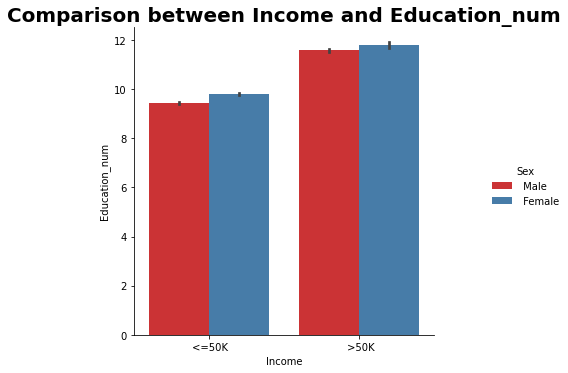

In [39]:
# visualizing the number of education with income
sns.catplot(x='Income',y='Education_num',hue='Sex',kind='bar',data=df)
plt.title('Comparison between Income and Education_num',fontsize=20,fontweight='bold')
plt.show()

##### Comment - The income is more than 50k for the people having higher education number. Both gender have income more than 50k.

<Figure size 720x576 with 0 Axes>

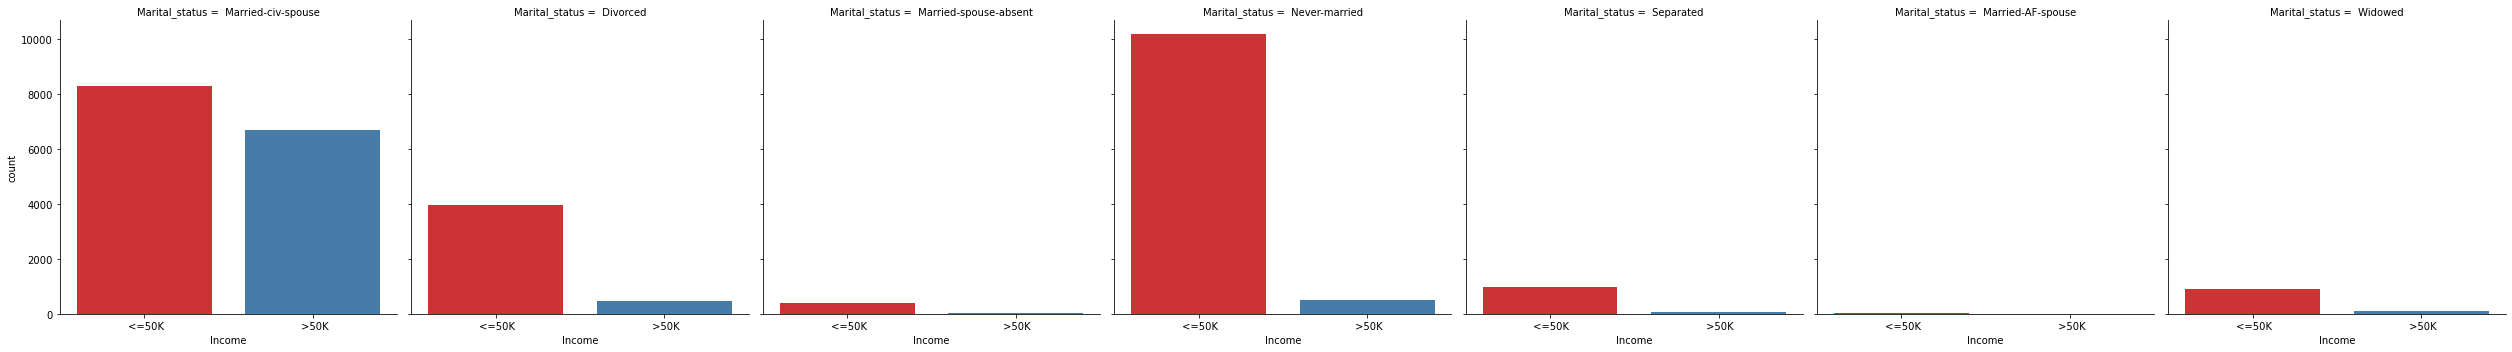

In [40]:
# visualizing the relation between Marital_status and income of the people
plt.figure(figsize=(10,8))
sns.catplot(x='Income',col='Marital_status',kind='count',data=df)
plt.show()

##### Comment - Married people getting income >50k compare to others, and more people who are single getting <=50k.

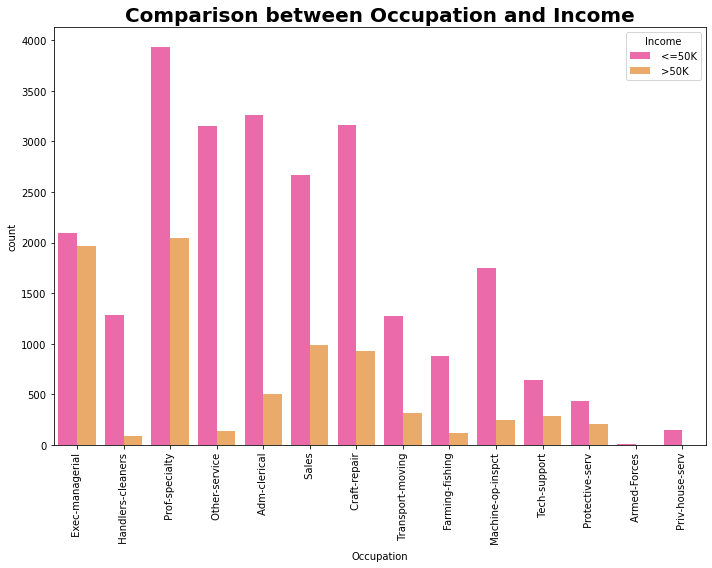

In [41]:
# visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,8))
sns.countplot(x='Occupation',hue='Income',data=df,palette='spring')
plt.title('Comparison between Occupation and Income',fontsize=20,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

##### Comment - 

- Prof-speciality and Exce-managerial have income more than 50k.
- Prof-speciality,Other services,Adm-clerical and Craft repair have income less than income.

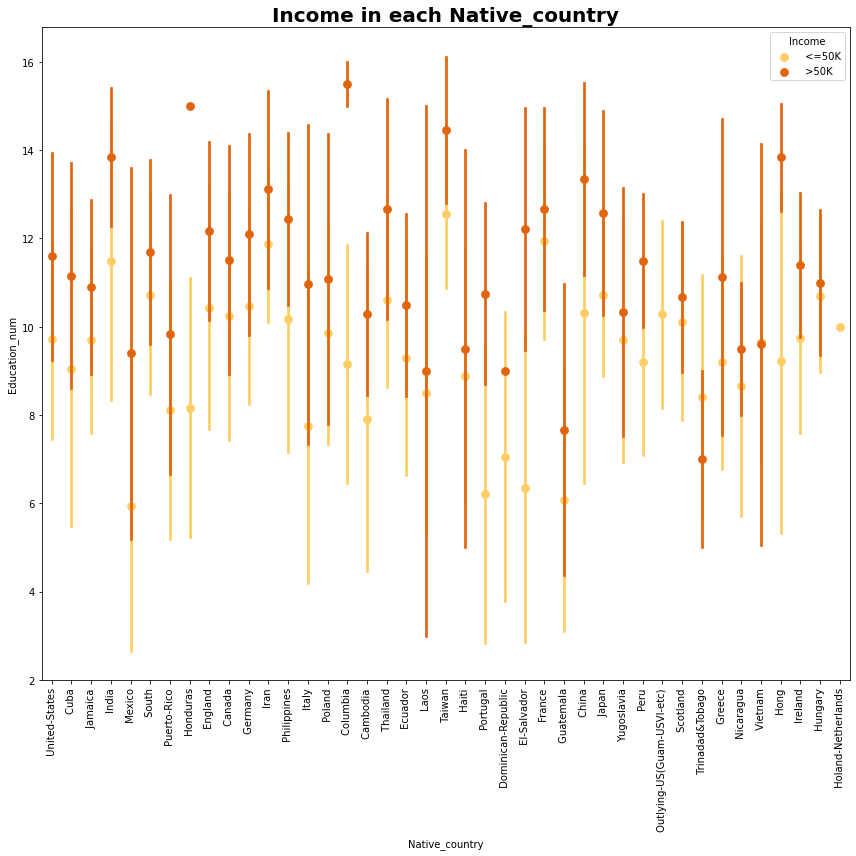

In [42]:
# visualizing how the Income changes for the Native_country
plt.figure(figsize=(12,12))
sns.pointplot(x='Native_country',y='Education_num',hue='Income',data=df,join=False,palette='YlOrBr',ci='sd')
plt.title('Income in each Native_country',fontsize=20,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

#### Exploration of Age 

In [43]:
print('Minimum Age:',df['Age'].min(),'years')
print('Maximum Age:',df['Age'].max(),'years')
print('Average Age:',df['Age'].mean(),'years')

Minimum Age: 17 years
Maximum Age: 90 years
Average Age: 38.58553602163757 years


In [44]:
#defining function to create new columns to classify people in according to different age group
def age_g(x):
    x=int(x)
    x=abs(x)
    if (18<x<31):
        return '19-30'
    if (30<x<41):
        return '31-40'
    if (40<x<51):
        return '41-50'
    if (50<x<61):
        return '51-60'
    if (60<x<71):
        return '61-70'
    else:
        return 'Greater than 70'

In [45]:
#calling function
df['age_g']=df['Age'].apply(age_g)

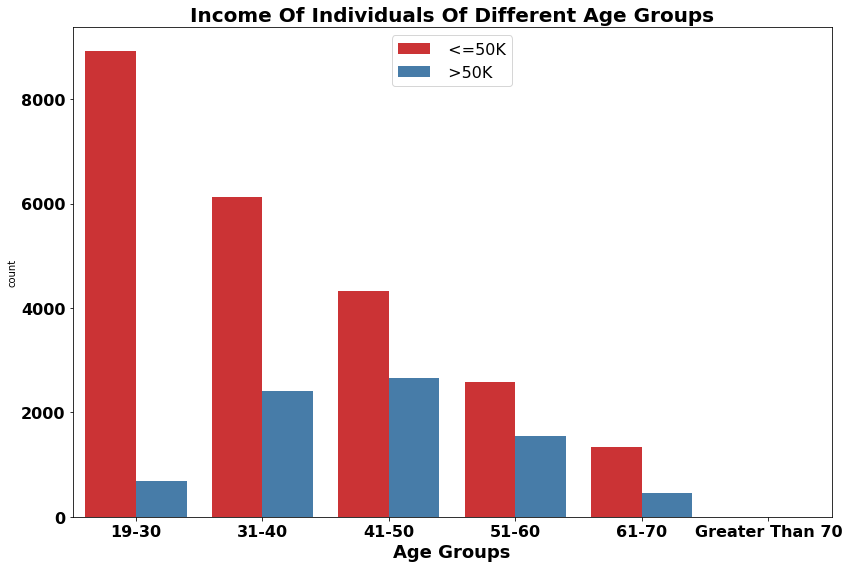

In [46]:
plt.figure(figsize=(12,8))
order_list = ['19-30','31-40','41-50','51-60','61-70','Greater Than 70']
p=sns.countplot(x='age_g',hue='Income',data=df,palette='Set1',order=order_list)
plt.title('Income Of Individuals Of Different Age Groups',fontsize=20,fontweight='bold')
p.set_xlabel('Age Groups',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

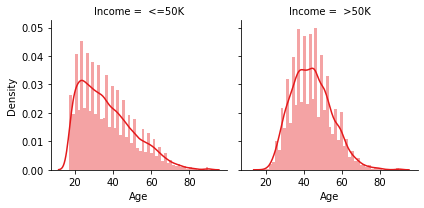

In [47]:
#distribution of age with icome categories 
ax=sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

##### Comment - We observe that 24% people earnings is more than 50k dollars, and the above plot tell us which age group they belong.

- Maximum people earning more than 50k belong to age group 41-50 & 51-60.It will be interesting to know which profession these categgory belong.
- Only 10% people in age group of 19-30 earns more than 50k dollars and this count drop even more above 60 age group.

### Population distribution as per Workclass

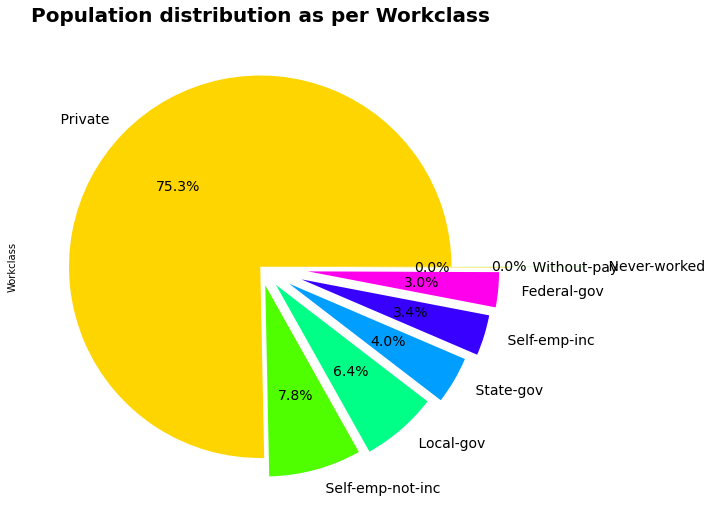

In [48]:
plt.rcParams['figure.autolayout']=True
sns.set_palette('hsv')
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%',textprops={'fontsize':14})
plt.title('Population distribution as per Workclass',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

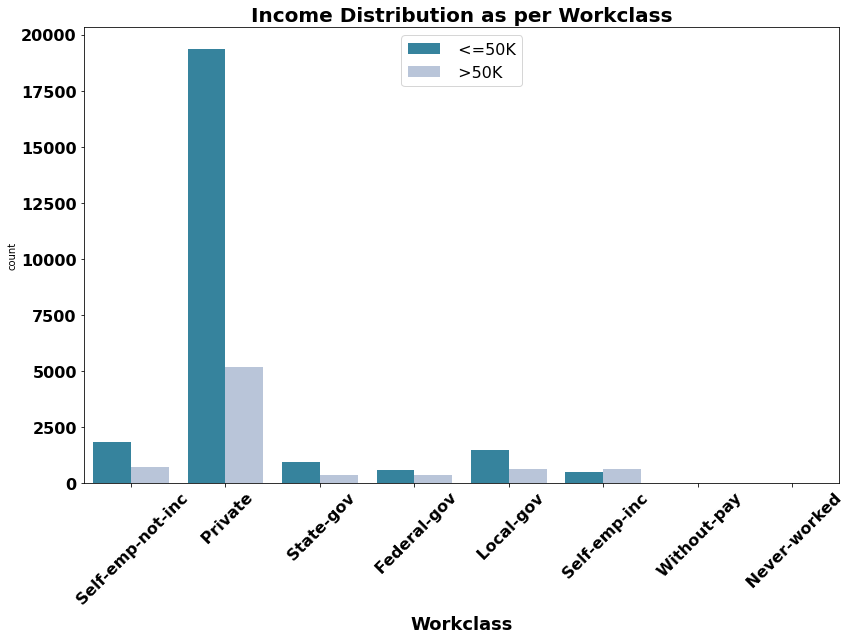

In [49]:
plt.figure(figsize=(12,9))
p=sns.countplot(x='Workclass',hue='Income',data=df,palette='PuBuGn_r')
plt.title('Income Distribution as per Workclass',fontsize=20,fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold',rotation=45)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

In [50]:
pd.crosstab(df['Income'],df['Workclass'],margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


##### Comment - 

- 75.3% people belongs to private sector followed by self employed not inccorporated with 7.8%
- Most insightful observation is that Self-employed incorporated category where the number of people who earn more than 50k dollars exceed those earning less than it.
- We can observe from Federal government countplot that very minute difference id there between the number of people whoe income is more or less than 50k dollars an year.Same goes with some difference.
- And also we have observe that there are very few people people who never or working without pay.These people may be college students or unemployed ,hence the number is less , THAT'S **GOOD**.

###### FACT- GOVERNMENT EMPLOYEES have high income as commpared to PRIVATE EMPLOYEES.

### Education VS Income

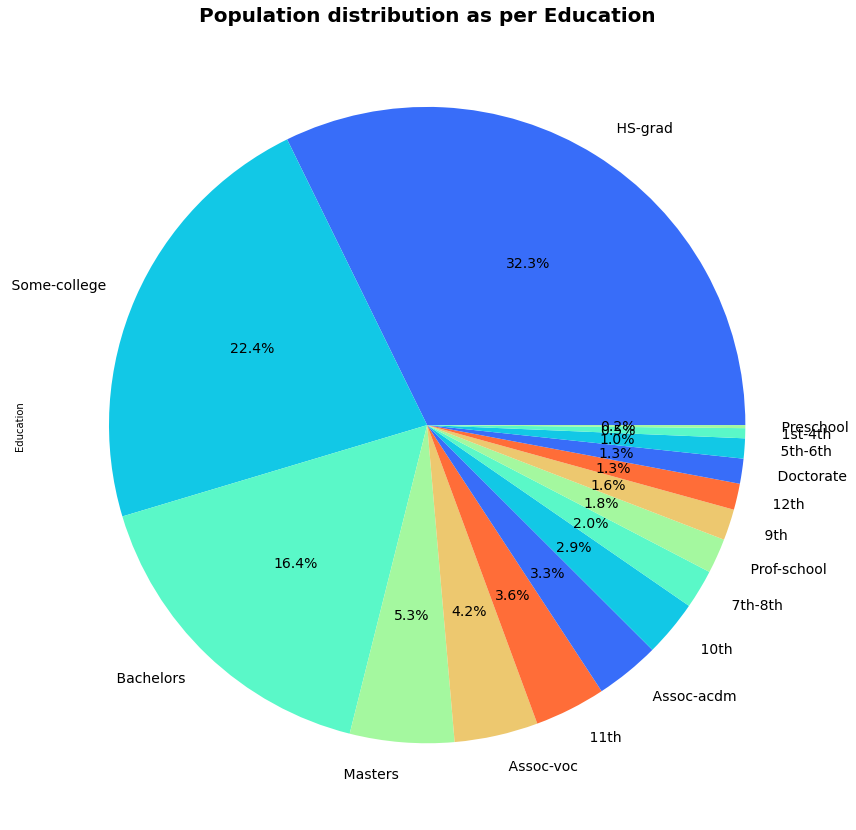

In [51]:
plt.rcParams['figure.autolayout']=True
sns.set_palette('rainbow')
plt.figure(figsize=(12,12))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%',textprops={'fontsize':14})
plt.title('Population distribution as per Education',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

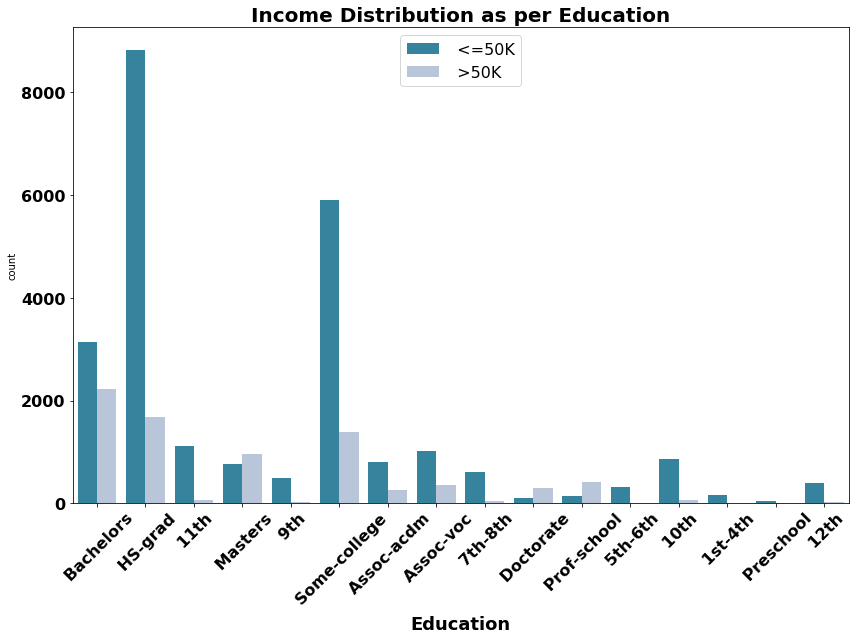

In [52]:
plt.figure(figsize=(12,9))
p=sns.countplot(x='Education',hue='Income',data=df,palette='PuBuGn_r')
plt.title('Income Distribution as per Education',fontsize=20,fontweight='bold')
p.set_xlabel('Education',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold',rotation=45)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

##### Comment - 

- 32.3% people with HS-Grad education is most prominent level of education out of all education.
- 5.3% people with masters and 1.3% population is Doctorate degree holder.Most educated and intellectual people belongs to this category.
- There are very few people who earn more than 50k having education below 12th level and maximum number of people who earn more than 50kk are bachelors degree holder,also higher degree holders like masters, doctorate etc earn more thann 50k.
- There are very few people who earn more than 50k in categories Assoc-acad or Accoc-voc

In [53]:
pd.crosstab(df['Education'],df['Workclass'],margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


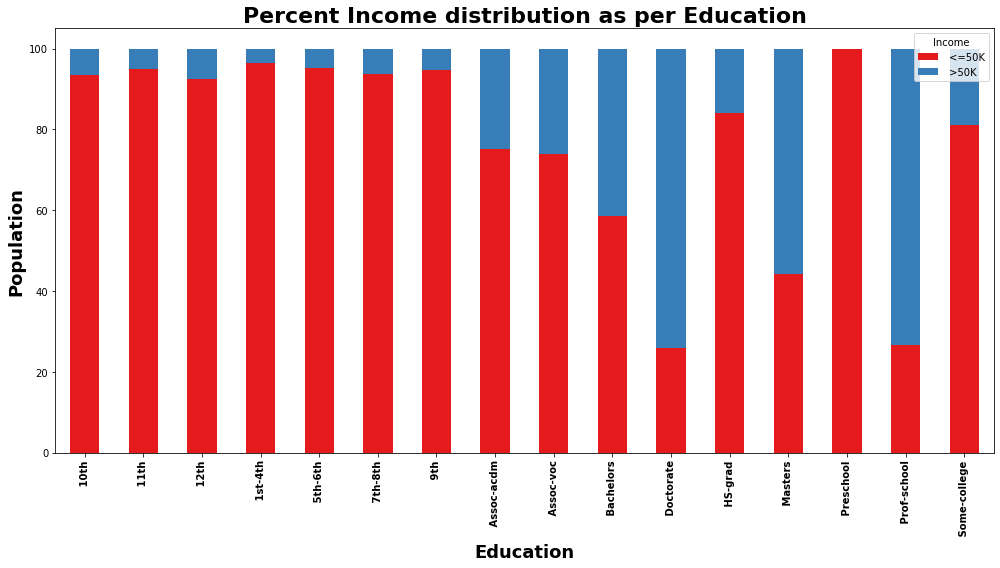

In [54]:
# Percentage Income distribution in terms of Education
sns.set_palette('Set1')
table = pd.crosstab(df['Education'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(14,8))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

##### Comment - 

- 75% percentage of doctorate earn more than 50k dollars a year,followed by prof-school.
- We can observe from crosstab that Private sector is mojor highest recruiter for HS-grad with 8305 people ,masters ,doctorate and followed by local government.

### Impact of Marital Status on Income

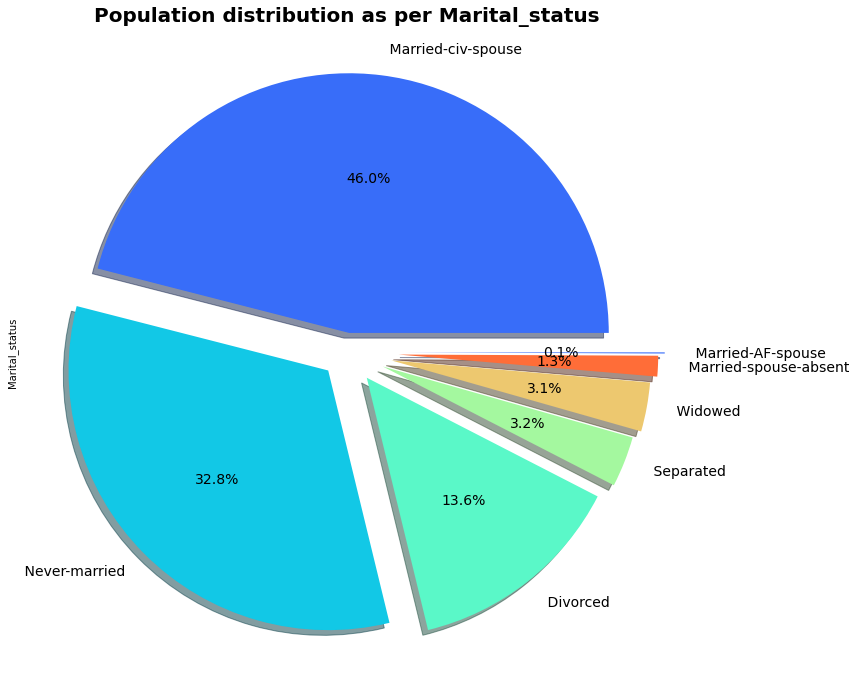

In [55]:
plt.rcParams['figure.autolayout']=True
sns.set_palette('rainbow')
plt.figure(figsize=(12,12))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.075,0.1,0.125,0.15,0.175,0.2,0.225],textprops={'fontsize':14},shadow=True)
plt.title('Population distribution as per Marital_status',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

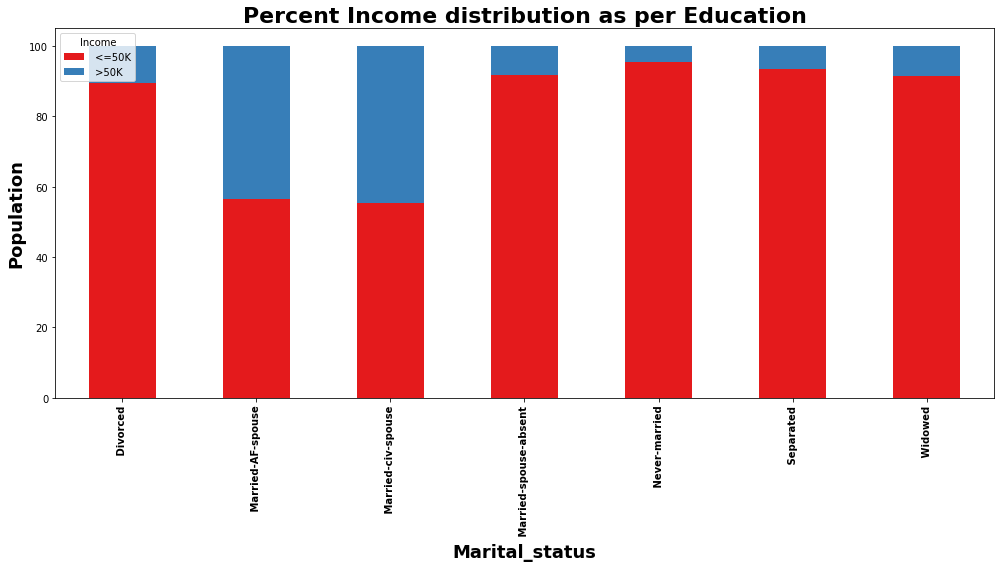

In [56]:
# Percentage Income distribution in terms of Marital_status
sns.set_palette('Set1')
table = pd.crosstab(df['Marital_status'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(14,8))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Marital_status', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [57]:
pd.crosstab(df['Marital_status'],df['Income'],margins=True).style.background_gradient(cmap='summer_r')

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


##### Comment - Married people are most likely to earn more than 50k dollars in year.Reasons may be any of the followings-

1. Emotional , financial support and stability
2. Married-civ-spouse is the only category which has comparable no. of people belonging to both categories.
3. Less than 25% of the adults earn more than 50k dollars an year.

### Occupation VS Income

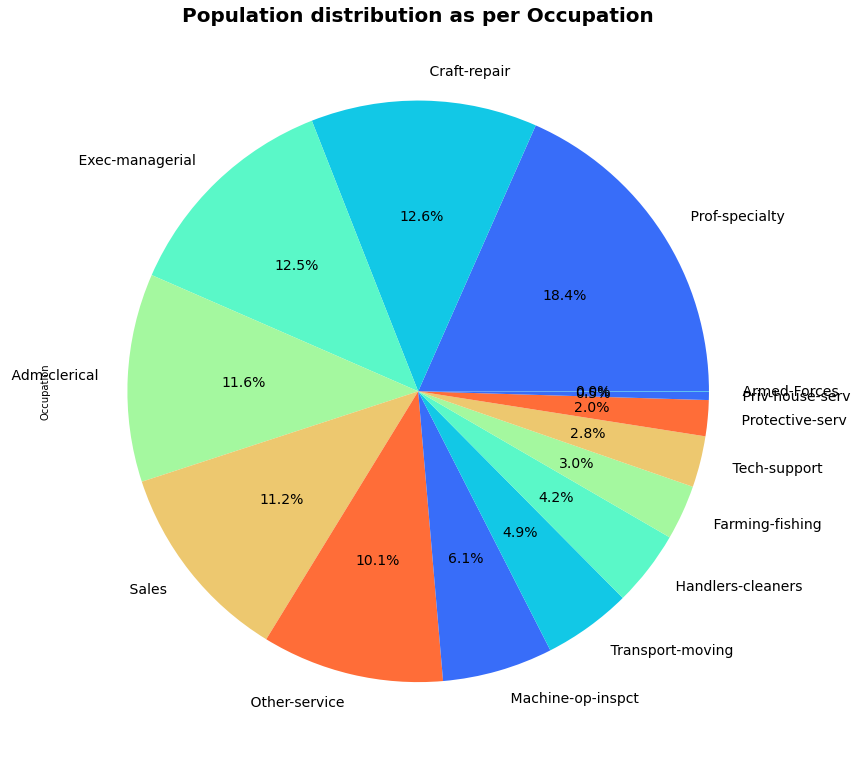

In [58]:
plt.rcParams['figure.autolayout']=True
sns.set_palette('rainbow')
plt.figure(figsize=(12,12))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%',textprops={'fontsize':14})
plt.title('Population distribution as per Occupation',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

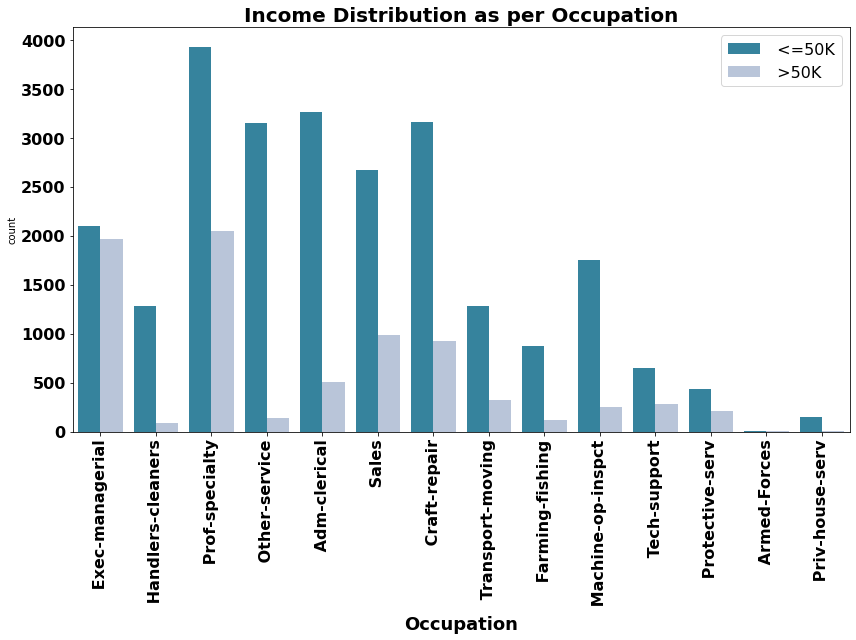

In [59]:
plt.figure(figsize=(12,9))
p=sns.countplot(x='Occupation',hue='Income',data=df,palette='PuBuGn_r')
plt.title('Income Distribution as per Occupation',fontsize=20,fontweight='bold')
p.set_xlabel('Occupation',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold',rotation=90)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

##### Comment - 

- Exec-managerial role are equally likely to earn more than 50K dollars an year.
- Peoples working in Arm- Forces, Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.

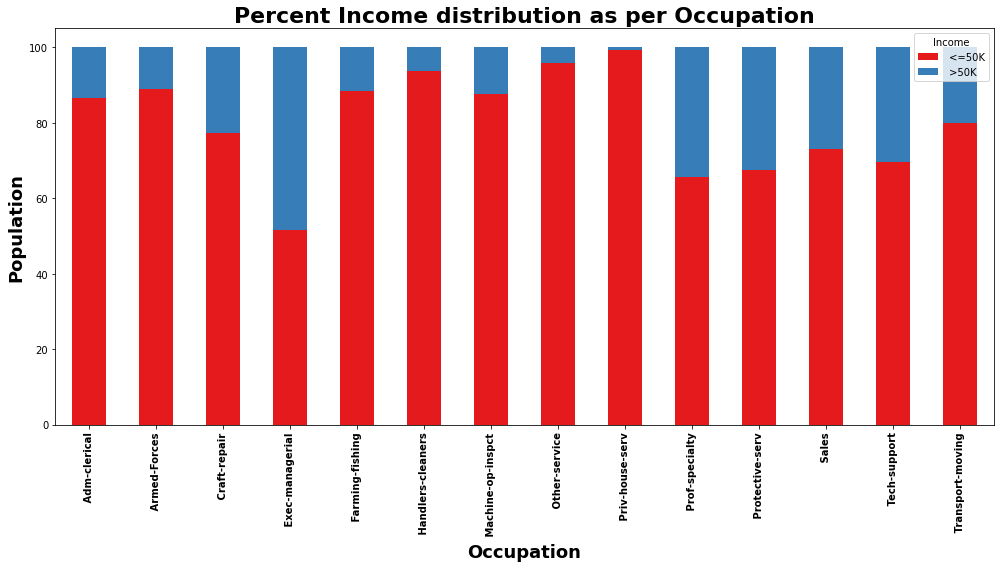

In [60]:
# Percentage Income distribution in terms of Occupation
sns.set_palette('Set1')
table = pd.crosstab(df['Occupation'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(14,8))
plt.title('Percent Income distribution as per Occupation', fontsize=22, fontweight='bold')
plt.xlabel('Occupation', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [61]:
pd.crosstab(df['Occupation'],df['Income'],margins=True).style.background_gradient(cmap='summer_r')

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


##### Comment - 

- **Prof-speciality with maximum 2049 people followed by exec- managerial position with 1968 people leads chart for people who earns greater than 50k dollar an year .**
- There is 50% probability of Exective Managerial position to be in top in people who earns more than 50k dollar.
- There is 33% probability for a Prof-speciality to earn more than 50k dollars an year.


In [62]:
# let's check where these different occupation fit with respect to workclass through crosstab.
pd.crosstab(df['Occupation'],df['Workclass'],margins=True).style.background_gradient(cmap='summer_r')

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Occupation,,,,,,,,,
Adm-clerical,317,283,0,2831,31,50,252,3,3767
Armed-Forces,9,0,0,0,0,0,0,0,9
Craft-repair,64,146,0,3191,106,530,56,1,4094
Exec-managerial,180,214,0,2690,400,392,189,0,4065
Farming-fishing,8,29,0,453,51,430,15,6,992
Handlers-cleaners,23,47,0,1272,2,15,9,1,1369
Machine-op-inspct,14,12,0,1911,13,36,13,1,2000
Other-service,35,193,0,2736,27,175,124,1,3291
Priv-house-serv,0,0,0,147,0,0,0,0,147


##### Comment - There are 7 people from Never worked category,i.e Prof-speciality with high earning demands and also same from Without pay category there 6 people,i.e farming fishing with high earning demands. 

### Relationship VS Income

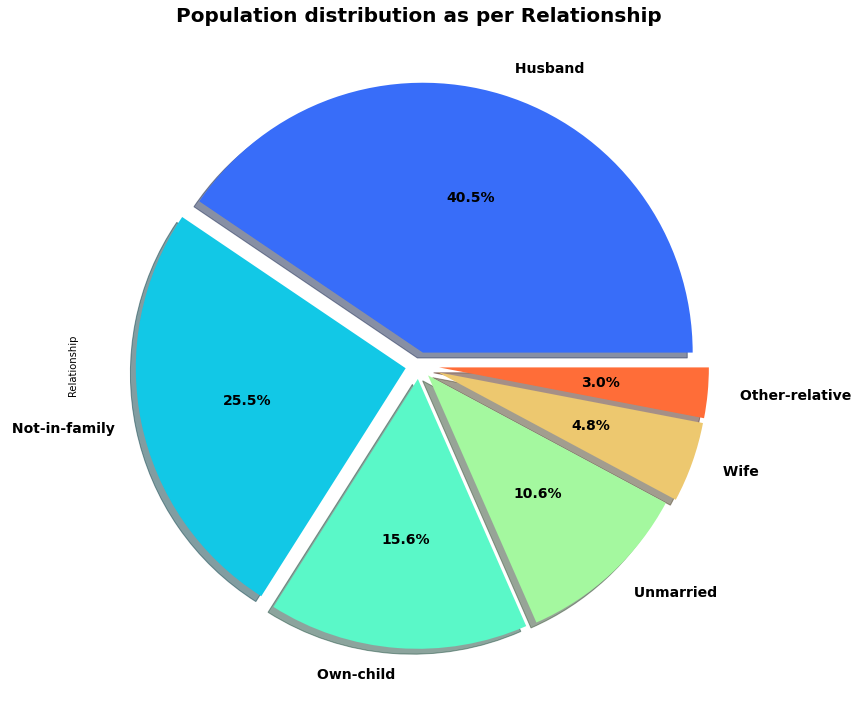

In [63]:
plt.rcParams['figure.autolayout']=True
sns.set_palette('rainbow')
plt.figure(figsize=(12,12))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075],textprops={'fontweight':'bold','fontsize':14},shadow=True)
plt.title('Population distribution as per Relationship',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

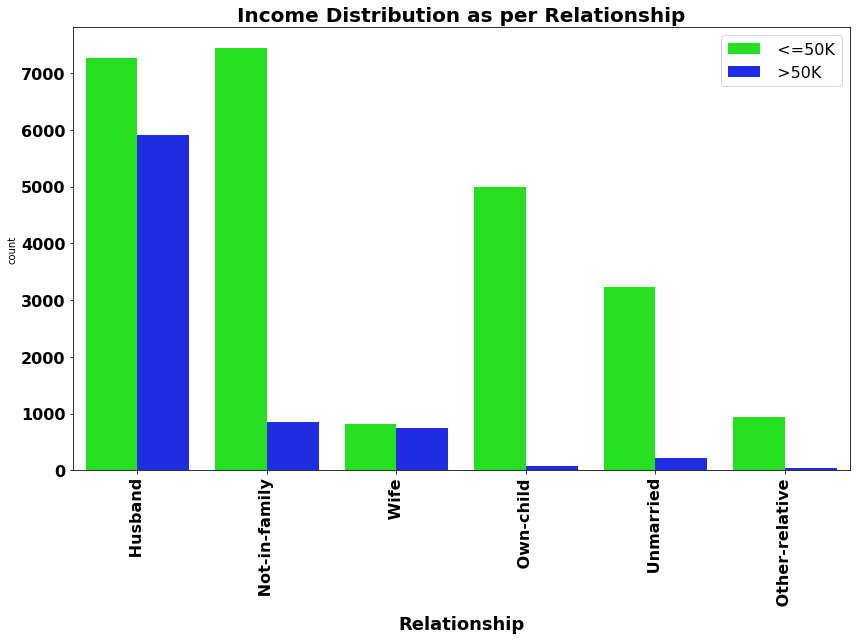

In [64]:
plt.figure(figsize=(12,9))
p=sns.countplot(x='Relationship',hue='Income',data=df,palette='hsv')
plt.title('Income Distribution as per Relationship',fontsize=20,fontweight='bold')
p.set_xlabel('Relationship',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold',rotation=90)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

##### Comment - 

- There are very few unmarried people who earn more than 50k dollar an year.
- In case of wife there are equal number of wives likely to earn more/less than 50k dollar an year.
- There is less possibilty of husbands to earn more than 50k dollar an year.

### Race VS Income

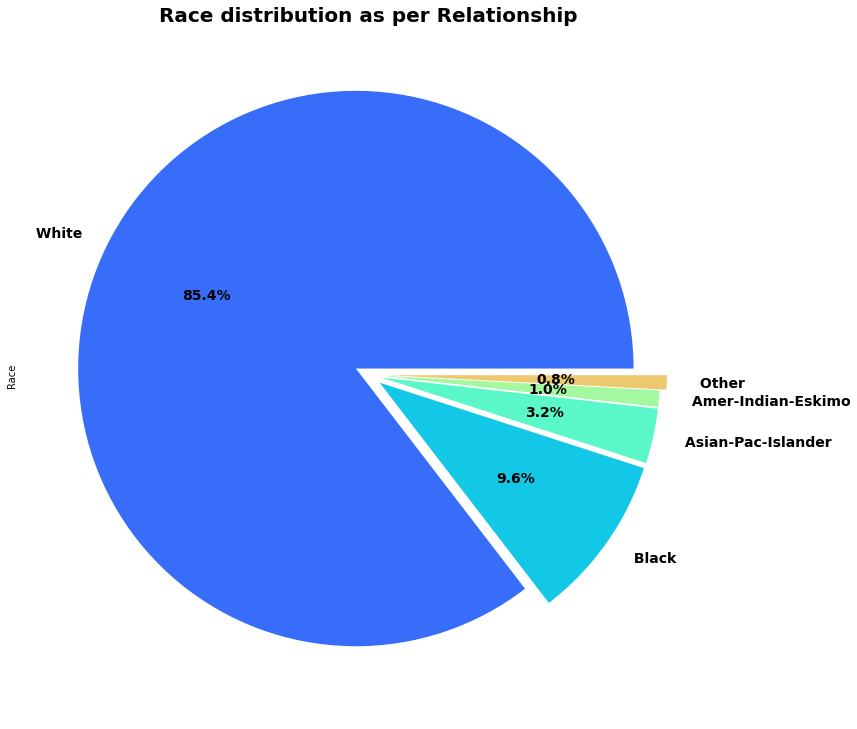

In [65]:
plt.rcParams['figure.autolayout']=True
sns.set_palette('rainbow')
plt.figure(figsize=(12,12))
df['Race'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075],textprops={'fontweight':'bold','fontsize':14})
plt.title('Race distribution as per Relationship',fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()

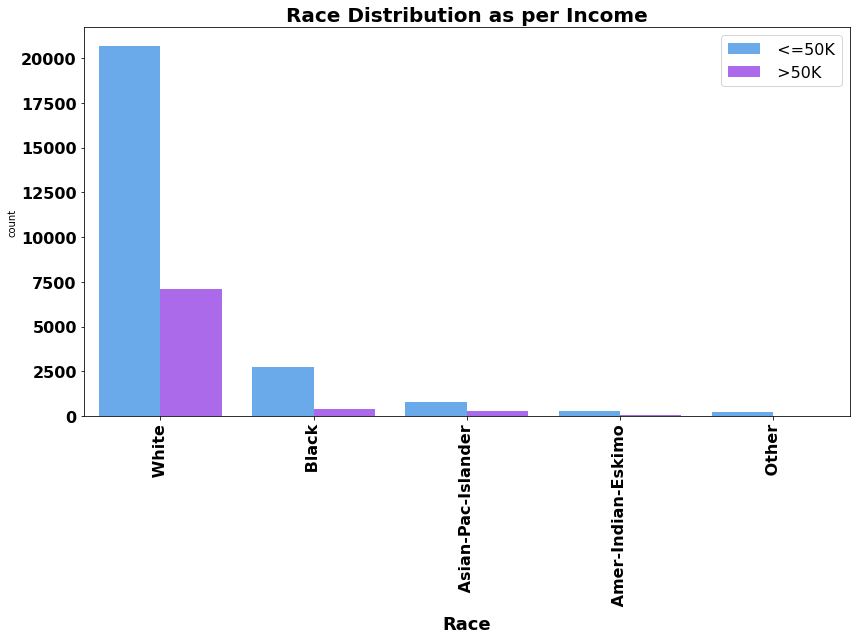

In [66]:
plt.figure(figsize=(12,9))
p=sns.countplot(x='Race',hue='Income',data=df,palette='cool')
plt.title('Race Distribution as per Income',fontsize=20,fontweight='bold')
p.set_xlabel('Race',fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold',rotation=90)
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(fontsize=16)
plt.show()

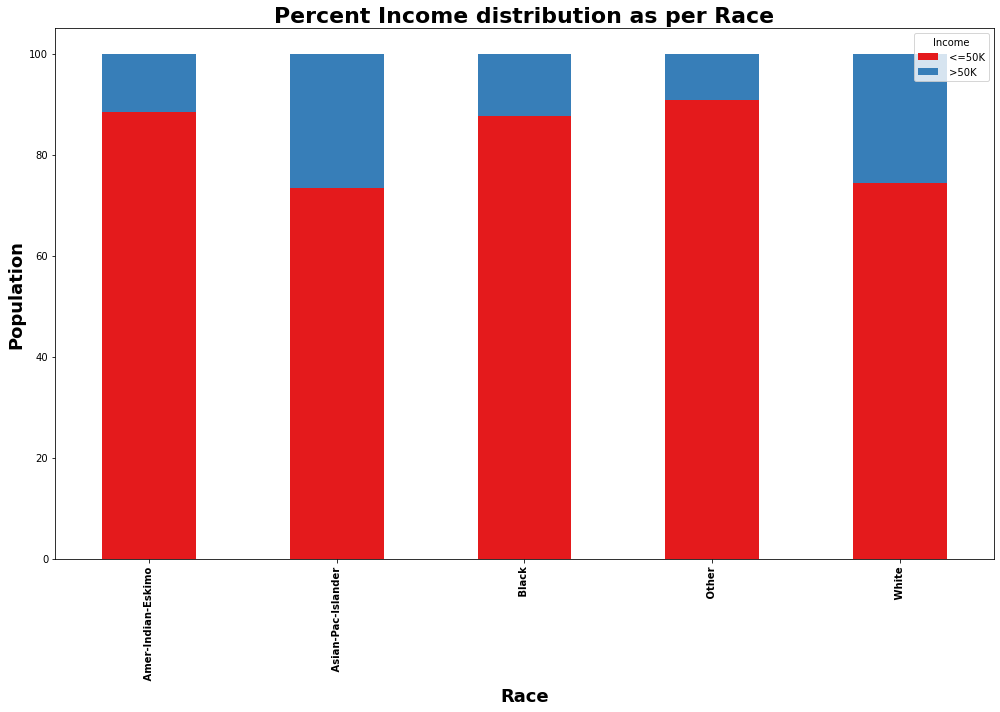

In [67]:
# Percentage Income distribution in terms of Occupation
sns.set_palette('Set1')
table = pd.crosstab(df['Race'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(14,10))
plt.title('Percent Income distribution as per Race', fontsize=22, fontweight='bold')
plt.xlabel('Race', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

##### Comment - 

- 9.6% are blacck and 85.4% are whites.
- Whites are maximum are number so there is greater chance of people earning 50k an year.

### Sex VS Income

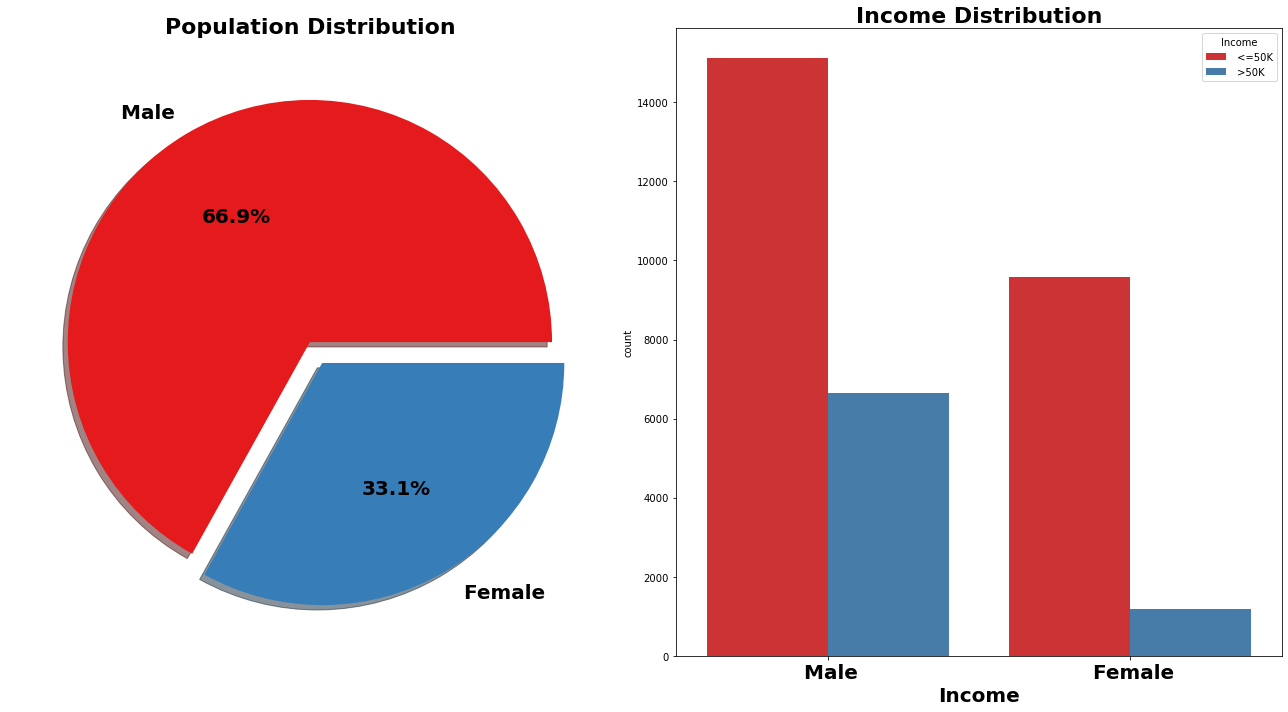

In [68]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',textprops={'fontsize':20,'fontweight':'bold'},ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution',fontsize=22,fontweight='bold')
ax[0].set_ylabel('')
sns.countplot('Sex',hue='Income',data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight='bold')
ax[1].set_xlabel('Income',fontsize=20,fontweight='bold')
plt.xticks(fontsize=20,fontweight='bold')
plt.show()

##### Comment - 

- We can observe that there is significant gap between male and female earnings.
- Less than 10% women earn more than 50k dollar.
- Around 33% men earning more than 50k dollar.

###### Let's find which occupation women are involved

In [69]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income],margins=True).style.background_gradient(cmap='summer_r')

##### Comment - 

- Maximum men work as Prof-speciality
- Most of females work as a Adm-clerical,other-service,Prof-speciality.

<AxesSubplot:xlabel='Race', ylabel='Education_num'>

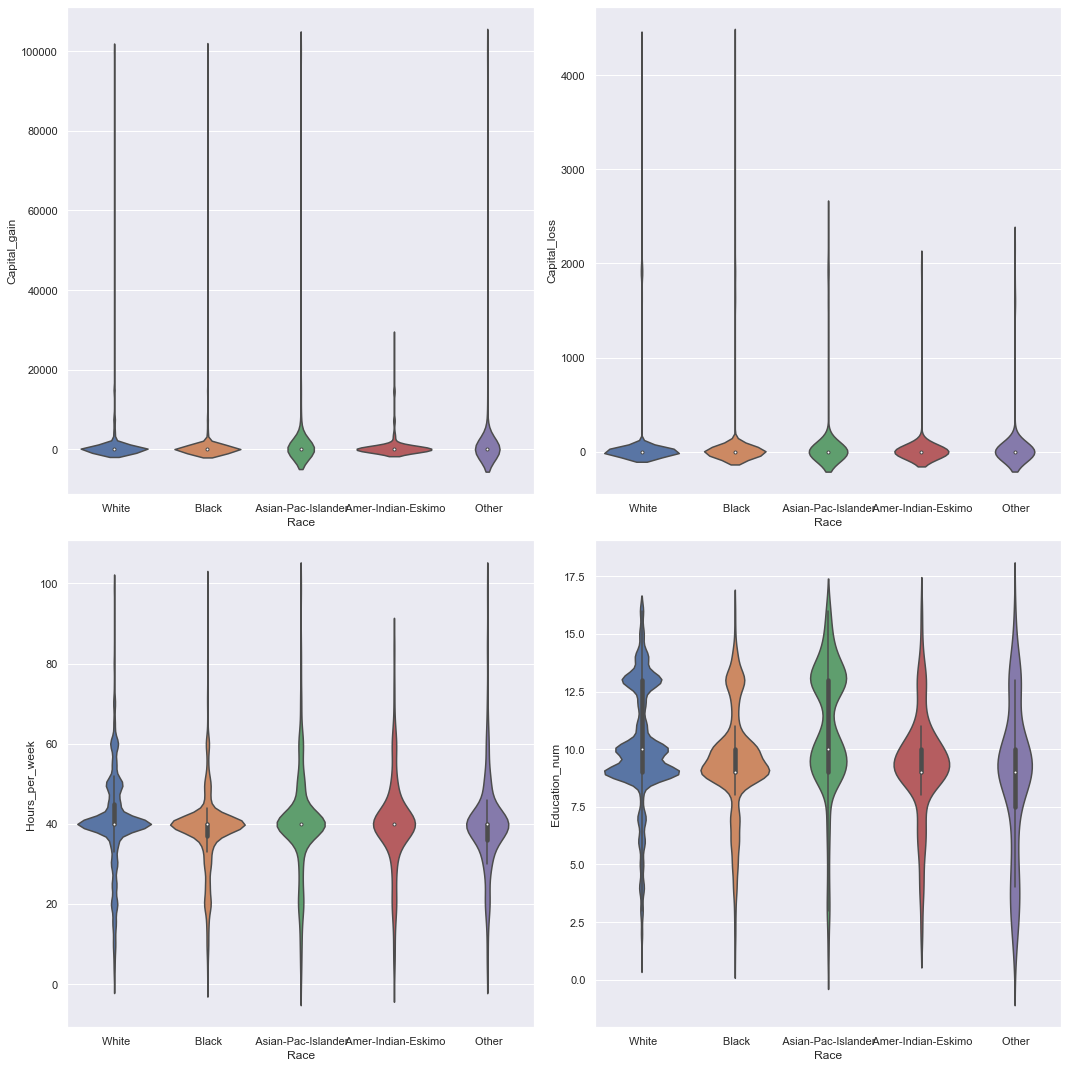

In [70]:
plt.rcParams['figure.figsize'] = [15,15]
sns.set(style = 'darkgrid')

plt.subplot(2,2,1)
sns.violinplot(x=df['Race'],y=df['Capital_gain'],data=df)
plt.subplot(2,2,2)
sns.violinplot(x=df['Race'],y=df['Capital_loss'],data=df)
plt.subplot(2,2,3)
sns.violinplot(x=df['Race'],y=df['Hours_per_week'],data=df)
plt.subplot(2,2,4)
sns.violinplot(x=df['Race'],y=df['Education_num'],data=df)

###### Above Violin plot show how capital gain, loss, hours per week and education vary with the race of the people

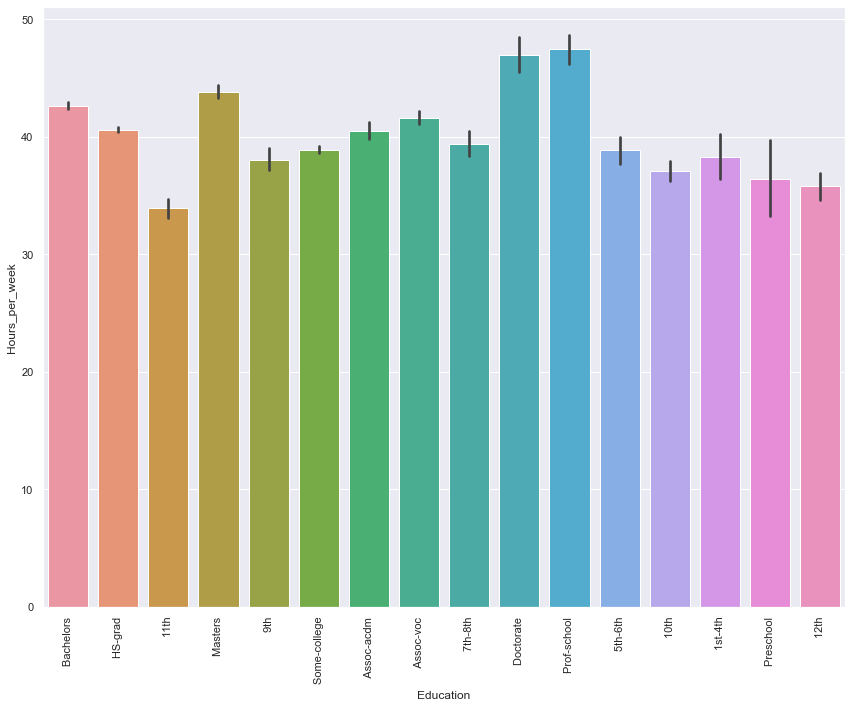

In [71]:
sns.set(rc={'figure.figsize':(12,10)})
sns_g=sns.barplot(x=df['Education'],y=df['Hours_per_week'],data=df)
plt.setp(sns_g.get_xticklabels(),rotation=90)
plt.show()

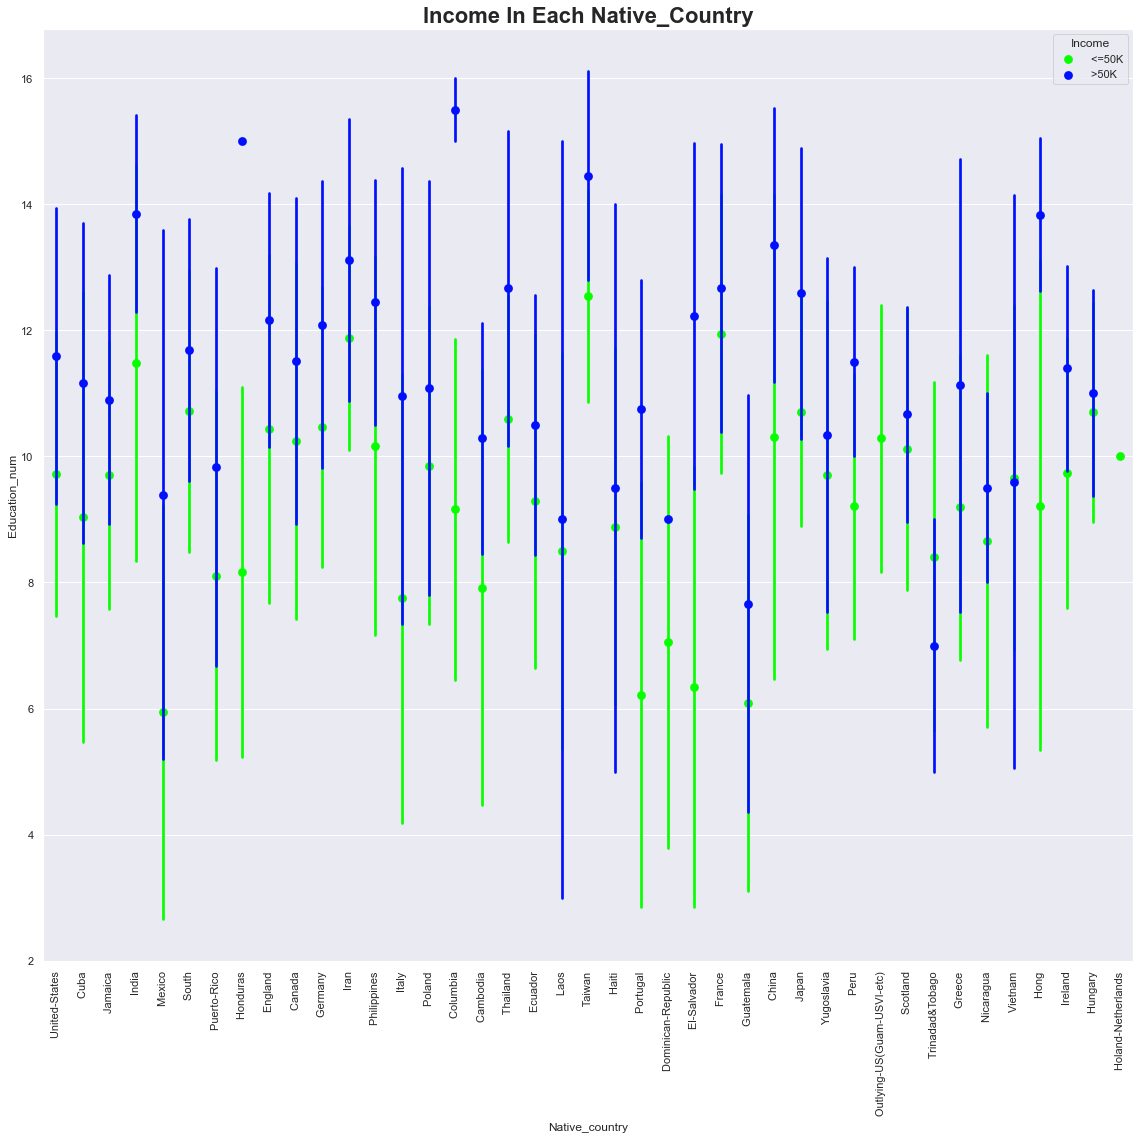

In [72]:
# visualizing income change for native country of the people 
plt.figure(figsize=(16,16))
sns.pointplot(x='Native_country',y='Education_num',hue='Income',data=df,join=False,palette='hsv',ci='sd')
plt.title('Income In Each Native_Country',fontsize=22,fontweight='bold')
plt.xticks(rotation=90)
plt.show()

## Multivariate Analysis

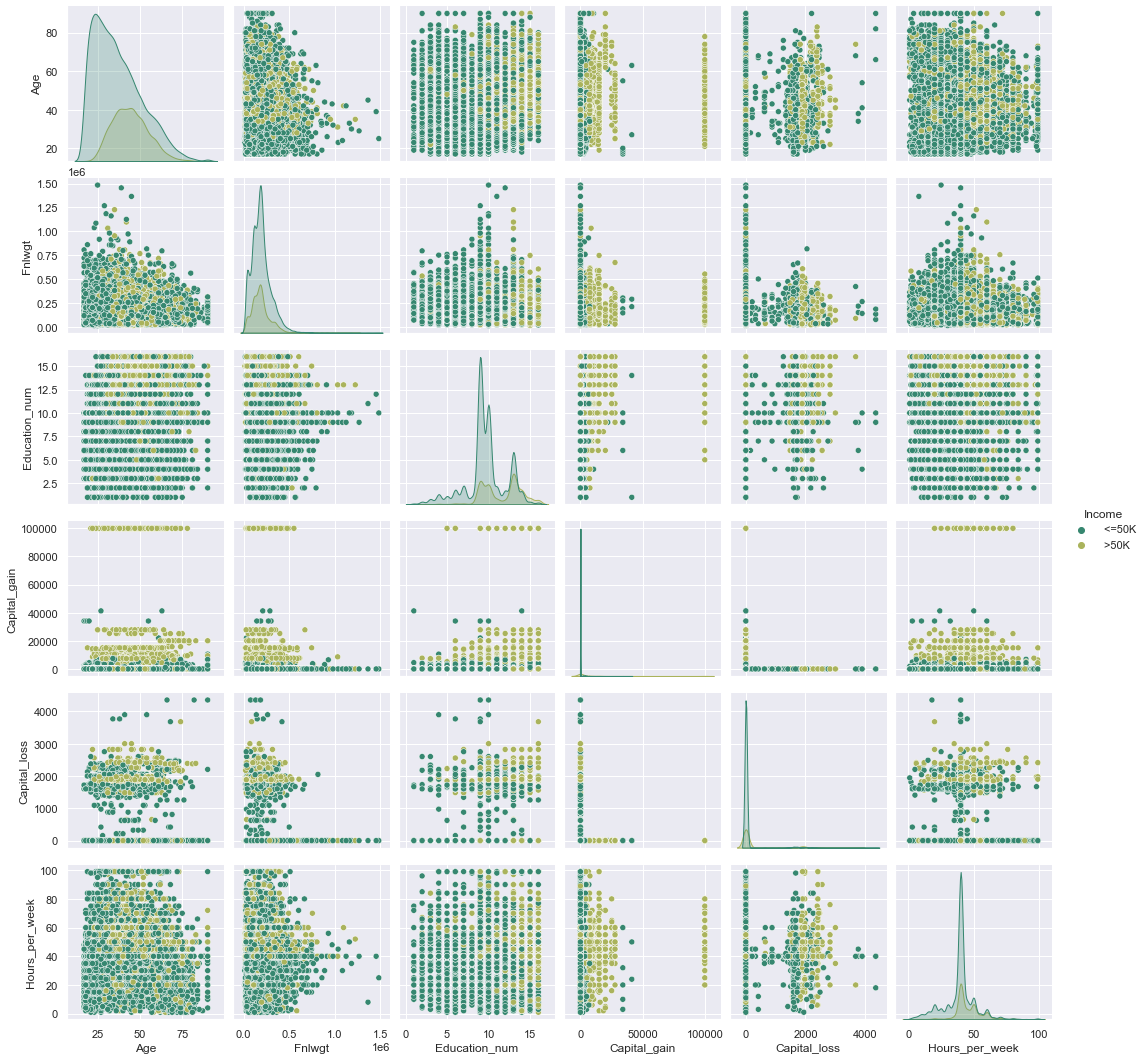

In [73]:
#checking pairwise relation in the dataset
sns.pairplot(df,hue='Income',palette='gist_earth')

## Encoding Categorical Data

In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Category:
    df[i]=le.fit_transform(df[i])

## Outliers Detection and Removal

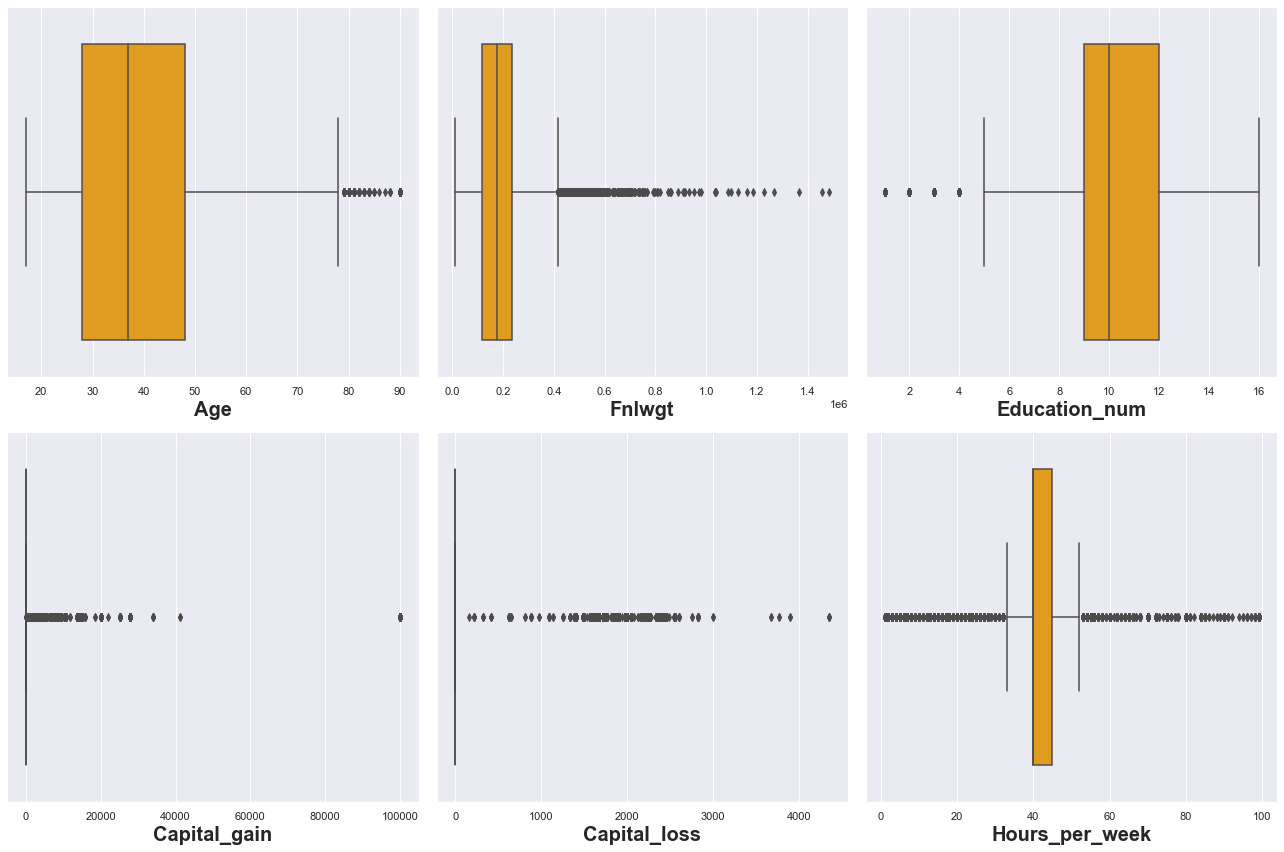

In [75]:
plt.figure(figsize=(18,12),facecolor='white')
plotnumber=1

for col in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col],color='orange')
        plt.xlabel(col,fontsize=20,fontweight='bold')
    plotnumber+=1
plt.show()    

###### From above boxplot we can observe that outliers exist in this dataset.

In [76]:
#dropping unncessary columns
df.drop(['Fnlwgt','Education','age_g'],axis=1,inplace=True)

In [77]:
df.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0
2,53,3,7,2,5,0,2,1,0,0,40,38,0
3,28,3,13,2,9,5,2,0,0,0,40,4,0
4,37,3,14,2,3,5,4,0,0,0,40,38,0


### Outliers Removal by using Zscore Method

In [78]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [79]:
print('Shape of the dataframe before removing outliers - ',df.shape)
print('Shape of the dataframe after removing outliers - ',df1.shape)
print('Percentage Data Loss - ',(df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()#copying changes to our original dataframe

Shape of the dataframe before removing outliers -  (32536, 13)
Shape of the dataframe after removing outliers -  (28061, 13)
Percentage Data Loss -  13.753995574133269


### Data Loss

In [81]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((32536-28061)/32536)*100,'%')

Percentage Data Loss : 13.753995574133269 %


##### Comment - As we observed that we lost 13.75% data.It's quite a big number but we can afford it because the dataset is quite large.

### Skewness of features

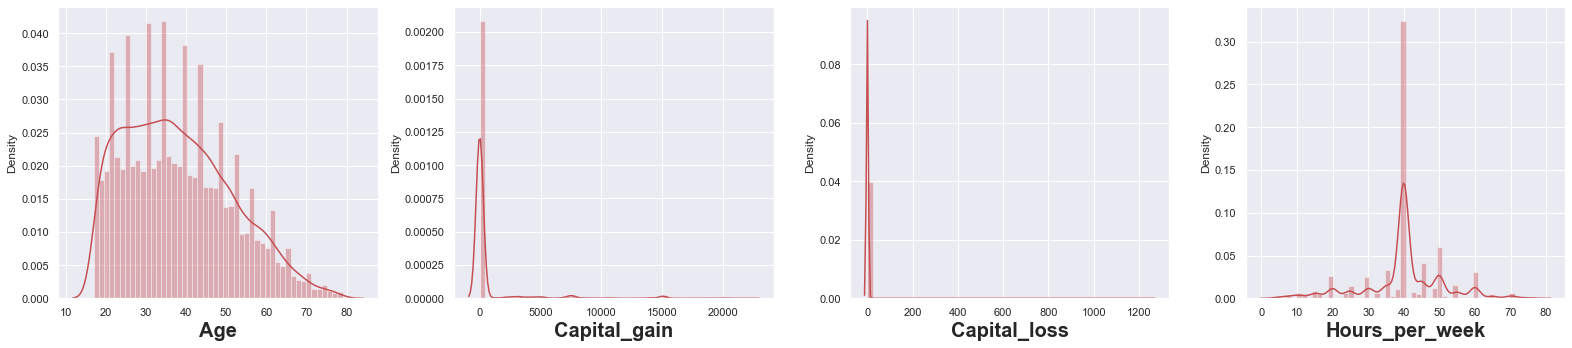

In [82]:
plt.figure(figsize=(22,5),facecolor='white')
plotnumber=1

for col in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnumber<=4:
        ax=plt.subplot(1,4,plotnumber)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20,fontweight='bold')
    plotnumber+=1
plt.show()  

In [83]:
df.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

##### Comment -

- Relationship,Sex,Native_country,Income are skewed but as they are categorical data ,concept of skewness doesnot mean anything to it.
- Capital_gain and Capital_loss are numeric variable with lot's of zeroes and high number in dataset.So skewness exist in them,but there is no point in transforming it because the end data will be skewed.We will bw opting scaling data to handle skewness.

### Corrleation

In [84]:
df.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.029674,0.045622,-0.286328,-0.001610,-0.270591,0.021292,0.089469,0.131998,0.023459,0.090783,0.037494,0.241844
Workclass,0.029674,1.000000,-0.002200,-0.015623,0.008779,-0.057823,0.067532,0.069617,0.011083,-0.010613,0.028104,0.001938,-0.007699
Education_num,0.045622,-0.002200,1.000000,-0.058587,0.073142,-0.092447,0.080766,0.003688,0.157858,0.007348,0.156303,0.149688,0.320271
Marital_status,-0.286328,-0.015623,-0.058587,1.000000,0.036477,0.183248,-0.084558,-0.125361,-0.069601,-0.016396,-0.196053,-0.032575,-0.194146
Occupation,-0.001610,0.008779,0.073142,0.036477,1.000000,-0.038735,0.000613,0.051055,0.009446,-0.004779,-0.022194,0.018069,0.030664
Relationship,-0.270591,-0.057823,-0.092447,0.183248,-0.038735,1.000000,-0.146432,-0.577195,-0.089095,0.030105,-0.261919,-0.011274,-0.248263
Race,0.021292,0.067532,0.080766,-0.084558,0.000613,-0.146432,1.000000,0.122731,0.031333,0.000186,0.055486,0.018660,0.094756
Sex,0.089469,0.069617,0.003688,-0.125361,0.051055,-0.577195,0.122731,1.000000,0.069539,-0.027323,0.236168,-0.011189,0.211792
Capital_gain,0.131998,0.011083,0.157858,-0.069601,0.009446,-0.089095,0.031333,0.069539,1.000000,-0.009077,0.098705,0.019185,0.343487
Capital_loss,0.023459,-0.010613,0.007348,-0.016396,-0.004779,0.030105,0.000186,-0.027323,-0.009077,1.000000,-0.003440,0.002925,-0.016465


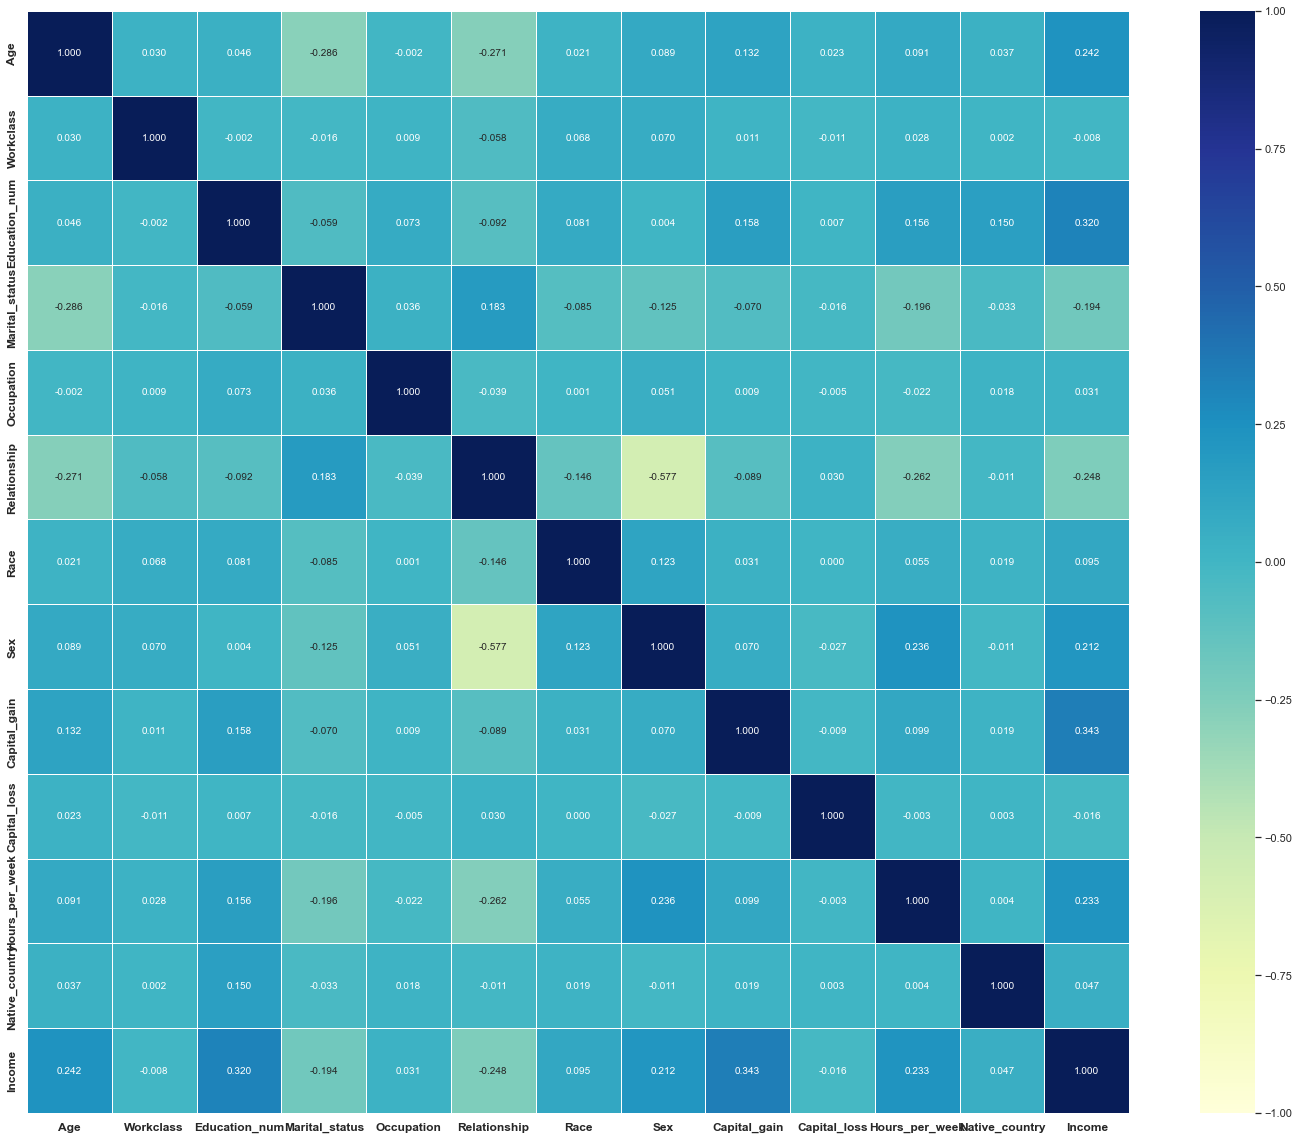

In [88]:
# plotting correlation
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),vmin=-1,vmax=1, annot=True,square=True, fmt='0.3f',linewidths=1,linecolor='white',annot_kws={'size':10},cmap="YlGnBu")
plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.show()

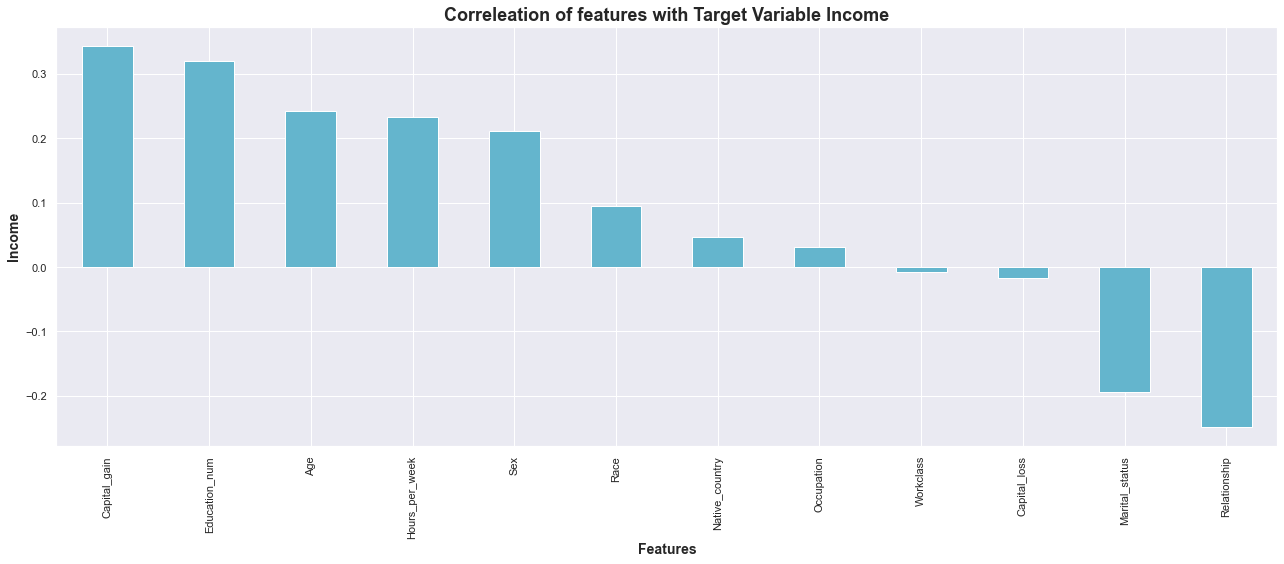

In [90]:
plt.figure(figsize=(18,8))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14,fontweight='bold')
plt.ylabel('Income',fontsize=14,fontweight='bold')
plt.title('Correleation of features with Target Variable Income',fontsize=18,fontweight='bold')
plt.show()

##### Comment - 

- Capital loss and workclass,occupation, native country, race are correlated with target variable with less than 10% correlation. After checking Mulitcollinearity we will decide to drop these poorly correlated features or go for PCA.

- Between input features maximum correlation of -0.557 exists between sex and relationship.

- Capital gain is highly correlated with target variable.

### Checking Multicollinearity between features using Variance_inflation_factor

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
vif['Features']=df.columns
vif

,VIF,Features
0,10.452897,Age
1,8.807425,Workclass
2,21.287850,Education_num
3,4.358505,Marital_status
4,3.357557,Occupation
5,2.937270,Relationship
6,36.291318,Race
7,4.566872,Sex
8,1.209589,Capital_gain
9,1.004295,Capital_loss


###### Strategy to Address Multicollinearity :

- By removing some of highly correlated features. But this will not work here because most of input features are correlated with each other either moderated or very badly.

- Another way to address Multicollinerity is to Scaled Data and then apply PCA.

### Balancing Imbalanced Target Variable

In [92]:
df.Income.value_counts()

0    21767
1     6294
Name: Income, dtype: int64

##### Comment - Target variable is imbalanced in nature so we have to balance the target variable.

## Balancing Target Variable using SMOTE

In [93]:
from imblearn.over_sampling import SMOTE

In [94]:
#Splitting data in target and dependent feature 
X=df.drop(['Income'],axis=1)
Y=df['Income']

In [95]:
# oversampling using smote techniques 
oversample=SMOTE()
X,Y = oversample.fit_resample(X,Y)

In [96]:
Y.value_counts()

0    21767
1    21767
Name: Income, dtype: int64

##### Comment - Now our dataset is balanced.

## Standard Scaling

In [97]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### PCA

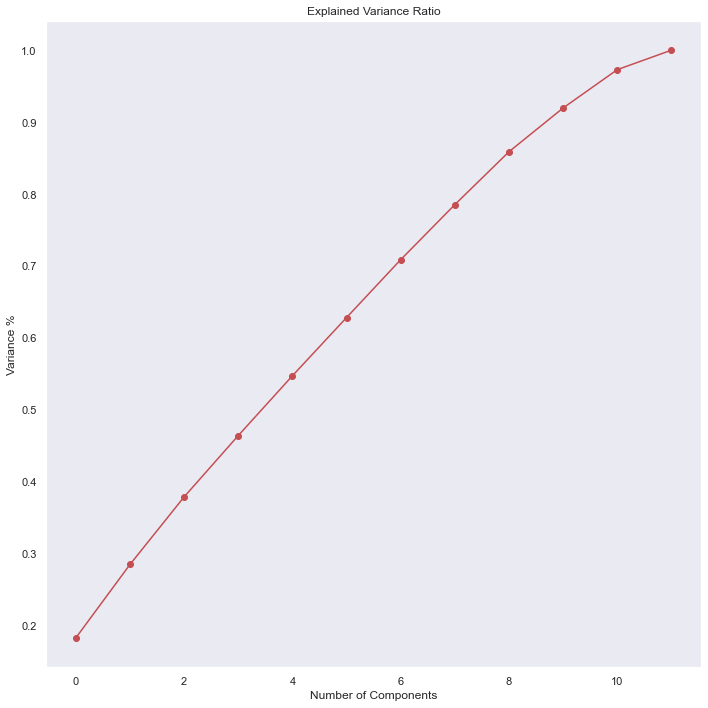

In [98]:
from sklearn.decomposition import PCA
pca = PCA()
#plot graph to find principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio')
plt.grid()

##### Comment - According to the graph ,we can observe that 9 principal components attribute for 90% of variation in the data .We should pick first 9 components for our prediction.

In [100]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [101]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

### Checking Multicollinearity after applying PCA

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(principle_x.values,i)for i in range(principle_x.shape[1])]
vif['Features']=principle_x.columns
vif

,VIF,Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8


## Machine Learning & Model Building

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (30473, 9)
Training target vector size: (30473,)
Test feature matrix size: (13061, 9)
Test target vector size: (13061,)


### Finding Best Random State

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.3)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7736773600796264 on Random_state 20


In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=20, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
log_reg.score(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7736773600796264


Confusion matrix of Logistics Regression : 
 [[4951 1572]
 [1384 5154]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      6523
           1       0.77      0.79      0.78      6538

    accuracy                           0.77     13061
   macro avg       0.77      0.77      0.77     13061
weighted avg       0.77      0.77      0.77     13061



### Finding best n_neighbors for KNN Regressor

In [113]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.39954418558667926
RMSE value for k=  2 is: 0.3620194910999944
RMSE value for k=  3 is: 0.35151883567946474
RMSE value for k=  4 is: 0.3449835744512272
RMSE value for k=  5 is: 0.3409566476424076
RMSE value for k=  6 is: 0.33944703481582017
RMSE value for k=  7 is: 0.33795399174181673
RMSE value for k=  8 is: 0.3379999706656373
RMSE value for k=  9 is: 0.3378148017414156
RMSE value for k=  10 is: 0.33745808225228613
RMSE value for k=  11 is: 0.3373215867760179
RMSE value for k=  12 is: 0.3374968078566725


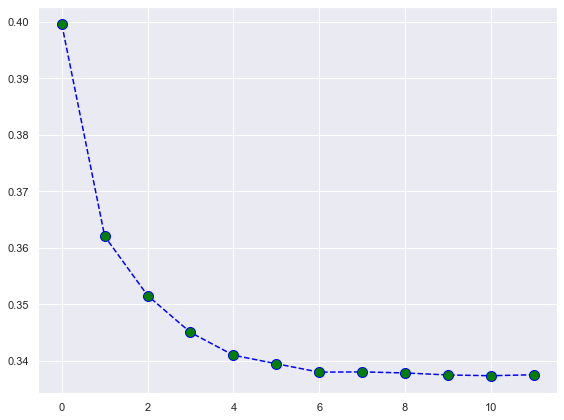

In [114]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

### Applying Other classification algorithm

In [116]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7736773600796264


Confusion matrix : 
 [[4951 1572]
 [1384 5154]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      6523
           1       0.77      0.79      0.78      6538

    accuracy                           0.77     13061
   macro avg       0.77      0.77      0.77     13061
weighted avg       0.77      0.77      0.77     13061



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8292626904524921


Confusion matrix : 
 [[4920 1603]
 [ 627 5911]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.75      0.82      6523
           1       0.79      0.90      0.84      6538

    accuracy                           0.83     13061
   macro avg       0.84      0.83      0.83     13061
weighted avg       0.84      0.83      0

### CrossValidation

In [117]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.76134145 0.7658206  0.76180085 0.77110371 0.77337468]
Mean Score : 0.7666882594391669
Std deviation : 0.004846286229637862




Cross Validation Score SVC() :

Score : [0.81382795 0.82278626 0.82416447 0.83013667 0.83666437]
Mean Score : 0.8255159449723074
Std deviation : 0.0076357744695944195




Cross Validation Score GaussianNB() :

Score : [0.69691053 0.7112668  0.7183875  0.71069255 0.72180106]
Mean Score : 0.711811687172545
Std deviation : 0.008562974834437215




Cross Validation Score DecisionTreeClassifier() :

Score : [0.79395888 0.80739635 0.83105547 0.82956242 0.83126579]
Mean Score : 0.8186477837554544
Std deviation : 0.015286797079394775




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.8086597  0.83599403 0.84885724 0.8563225  0.85883299]
Mean Score : 0.8417332912137072
Std deviation : 0.018345555040436595




Cross Validation Score RandomForestClassifier() :

Score : [0.82990697 0.8514

## Hyper Parameter Tuning : GridSearchCV

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
parameter={'criterion':['gini','entropy'],
          'min_samples_split':[3,5,8],
          'max_depth':[20,30,40],
          'n_estimators':[100,150,200]
          }

In [120]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose = 10)

In [121]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.852 total time=   2.6s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.854 total time=   2.7s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.845 total time=   2.6s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.850 total time=   2.6s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [122]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_estimators': 200}

## Final  Model

In [127]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 200,max_depth= 30,min_samples_split=3)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test,y_pred))

Accuracy Score :
 0.8627210780185285


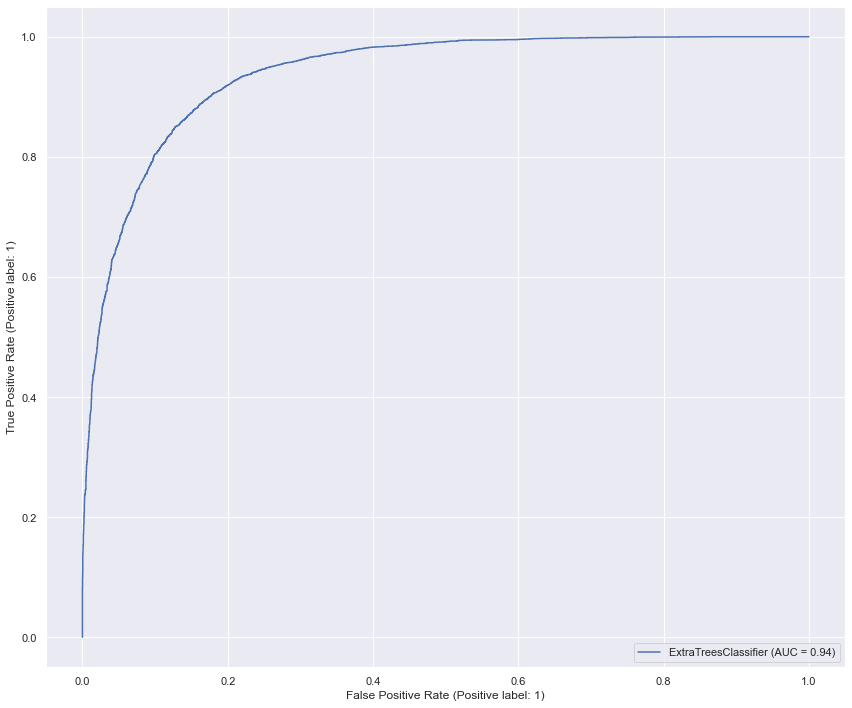

<Figure size 864x864 with 0 Axes>

Auc Score :
 0.8626902092494605


In [130]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)
plt.legend(prop={'size':11},loc='lower right')
plt.figure(figsize=(12,12))
plt.show()
auc_score=roc_auc_score(Y_test,Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## Saving Model

In [131]:
import joblib
joblib.dump(Final_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']